# Testing full runs with different scenarios

Bin Wang

---

**Three runs**:

1. **Ambient simulation**:

2. **Thermal extreme**: 2 weeks

3. **Compound extreme**: the thermal extreme above + drought for 2 weeks

In [35]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#import pickle
#import sys
#import os
#import glob
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [36]:
date = np.arange(np.datetime64('2019-01-01'),np.datetime64('2020-01-01'),1)
date.shape

(365,)

## Data Aanalysis

In [5]:
Mic_walk = pd.read_csv('walk/Mic_walk_walk.csv',index_col=0)/10000
Mic_sc1  = pd.read_csv('sc1/Mic_walk_sc1.csv',  index_col=0)/10000
Mic_sc2  = pd.read_csv('sc2/Mic_walk_sc2.csv',  index_col=0)/10000

In [6]:
Mic_walk.head()

0         1         2         3         4       0.1       1.1  \
0  0.990400  0.973600  1.006400  1.034400  1.044000  1.033600  0.944000   
1  0.979367  0.961466  0.992883  1.021024  1.030165  1.021419  0.931207   
2  0.969854  0.950516  0.981253  1.008702  1.015608  1.010304  0.920255   
3  0.962058  0.942014  0.972077  0.998736  1.005483  1.000835  0.909421   
4  0.956617  0.936376  0.966234  0.991726  0.998384  0.994158  0.904277   

        2.1       3.1       4.1       0.2       1.2       2.2       3.2  \
0  1.036800  1.008000  0.982400  0.996800  1.023200  0.978400  1.005600   
1  1.023060  0.994223  0.969808  0.984342  1.010112  0.965429  0.993208   
2  1.011629  0.981903  0.957163  0.973134  0.998142  0.954829  0.981887   
3  1.002361  0.971518  0.948370  0.961330  0.988435  0.946253  0.972768   
4  0.997504  0.964049  0.941799  0.954749  0.981088  0.940823  0.966143   

        4.2       0.3       1.3       2.3       3.3       4.3  
0  0.914400  0.977600  1.059200  0.978400  1.074400  0.980800  
1  0.902662  0.965875  1.045422  0.965830  1.061158  0.968092  
2  0.892495  0.955659  1.032261  0.953858  1.048532  0.956345  
3  0.883232  0.946911  1.021656  0.943928  1.038066  0.943955  
4  0.876096  0.940881  1.014623  0.936467  1.029746  0.935979

In [32]:
Mic_walk.shape

(2556, 20)

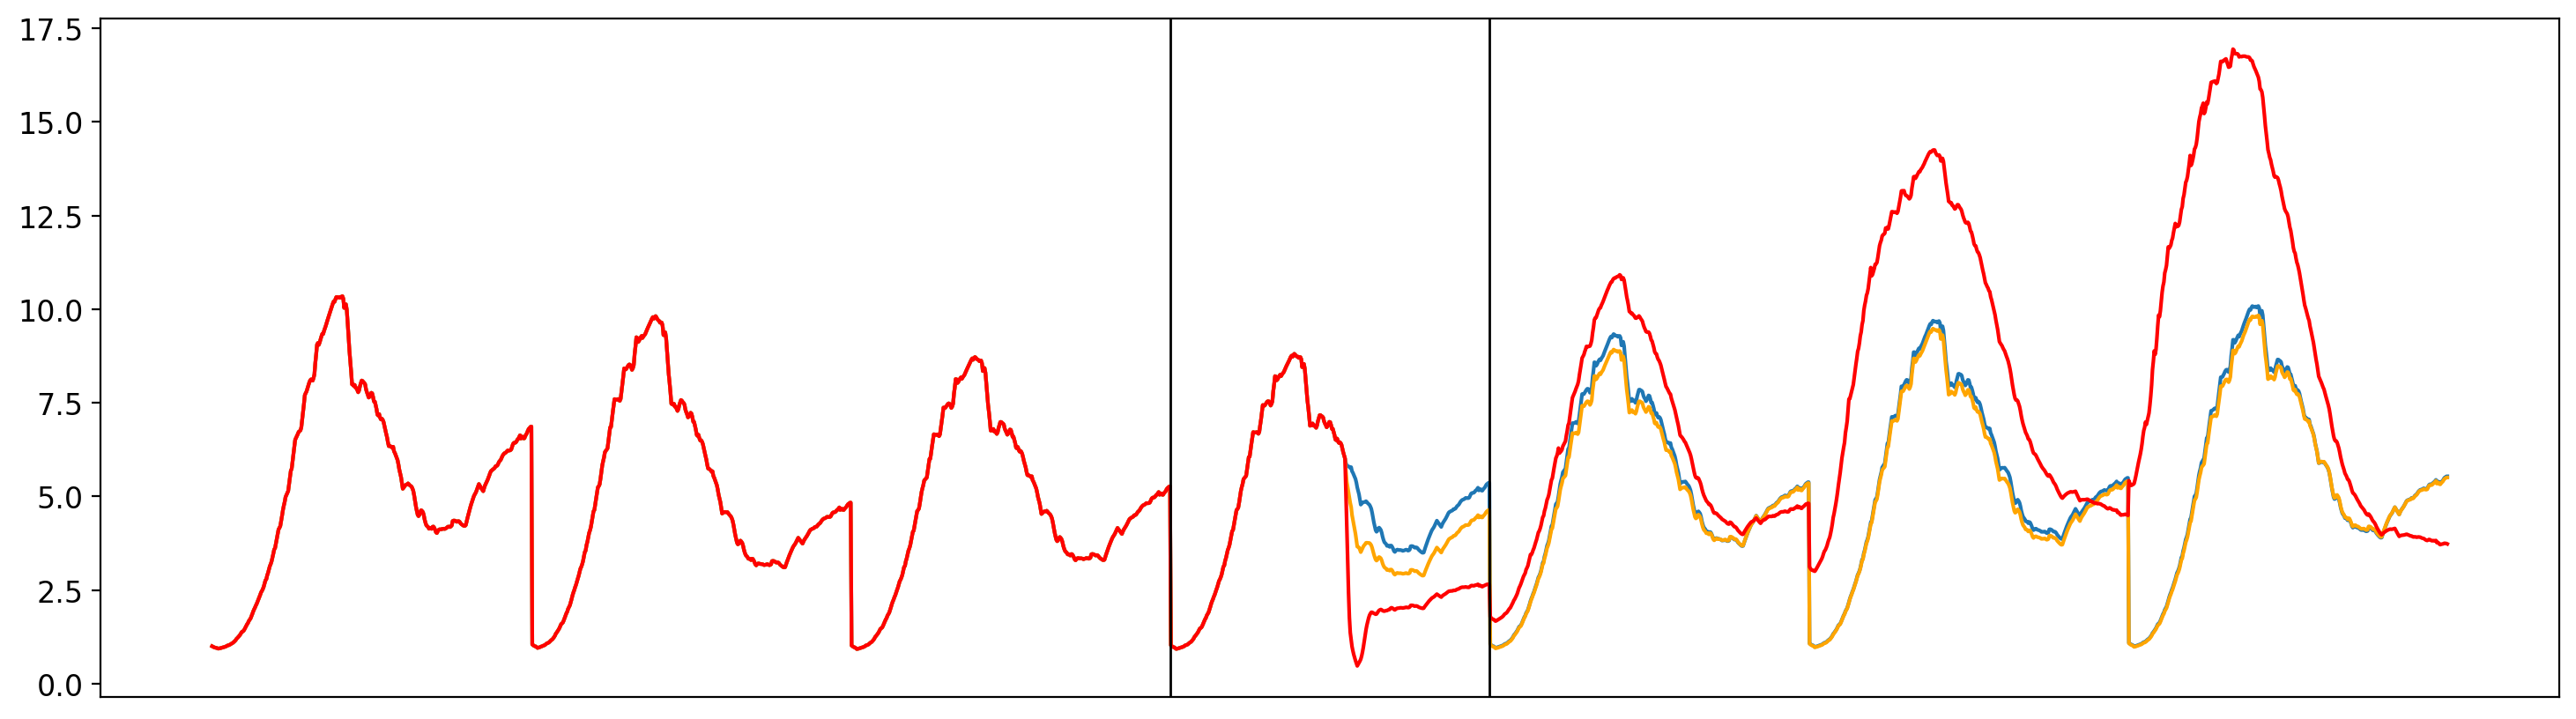

In [34]:
fig,ax = plt.subplots(1,1,figsize=(18,5))

ax.plot(Mic_walk.mean(axis=1))
ax.plot(Mic_sc1.mean(axis=1),color='orange')
ax.plot(Mic_sc2.mean(axis=1),color='red')

ax.axvline(x=365*3, color='k',linestyle='-',lw=1)
ax.axvline(x=365*4, color='k',linestyle='-',lw=1)
ax.tick_params(bottom=False,labelbottom=False,labelsize=12) 

plt.show()

### Community composition

In [37]:
Mic_walk_comp = pd.read_csv('walk/Mic_walk_walk.csv',index_col=0)/10000
Mic_sc1_comp  = pd.read_csv('sc1/Mic_walk_sc1.csv',  index_col=0)/10000
Mic_sc2_comp  = pd.read_csv('sc2/Mic_walk_sc2.csv',  index_col=0)/10000

In [42]:
Mic_walk_comp.head()

0         1         2         3         4         5         6  \
Tax1  0.0125  0.012356  0.012223  0.012104  0.012005  0.011927  0.011824   
Tax2  0.0102  0.010115  0.010032  0.009953  0.009879  0.009812  0.009559   
Tax3  0.0099  0.009819  0.009741  0.009667  0.009600  0.009541  0.009293   
Tax4  0.0075  0.007362  0.007246  0.007159  0.007115  0.007119  0.007089   
Tax5  0.0104  0.010328  0.010259  0.010193  0.010133  0.010081  0.009646   

             7         8         9  ...  2546  2547  2548  2549  2550  2551  \
Tax1  0.011729  0.011698  0.011678  ...   0.0   0.0   0.0   0.0   0.0   0.0   
Tax2  0.009314  0.009271  0.009235  ...   0.0   0.0   0.0   0.0   0.0   0.0   
Tax3  0.008956  0.008919  0.008699  ...   0.0   0.0   0.0   0.0   0.0   0.0   
Tax4  0.007082  0.007183  0.007301  ...   0.0   0.0   0.0   0.0   0.0   0.0   
Tax5  0.009508  0.009480  0.009459  ...   0.0   0.0   0.0   0.0   0.0   0.0   

      2552  2553  2554  2555  
Tax1   0.0   0.0   0.0   0.0  
Tax2   0.0   0.0   0.0   0.0  
Tax3   0.0   0.0   0.0   0.0  
Tax4   0.0   0.0   0.0   0.0  
Tax5   0.0   0.0   0.0   0.0  

[5 rows x 2556 columns]

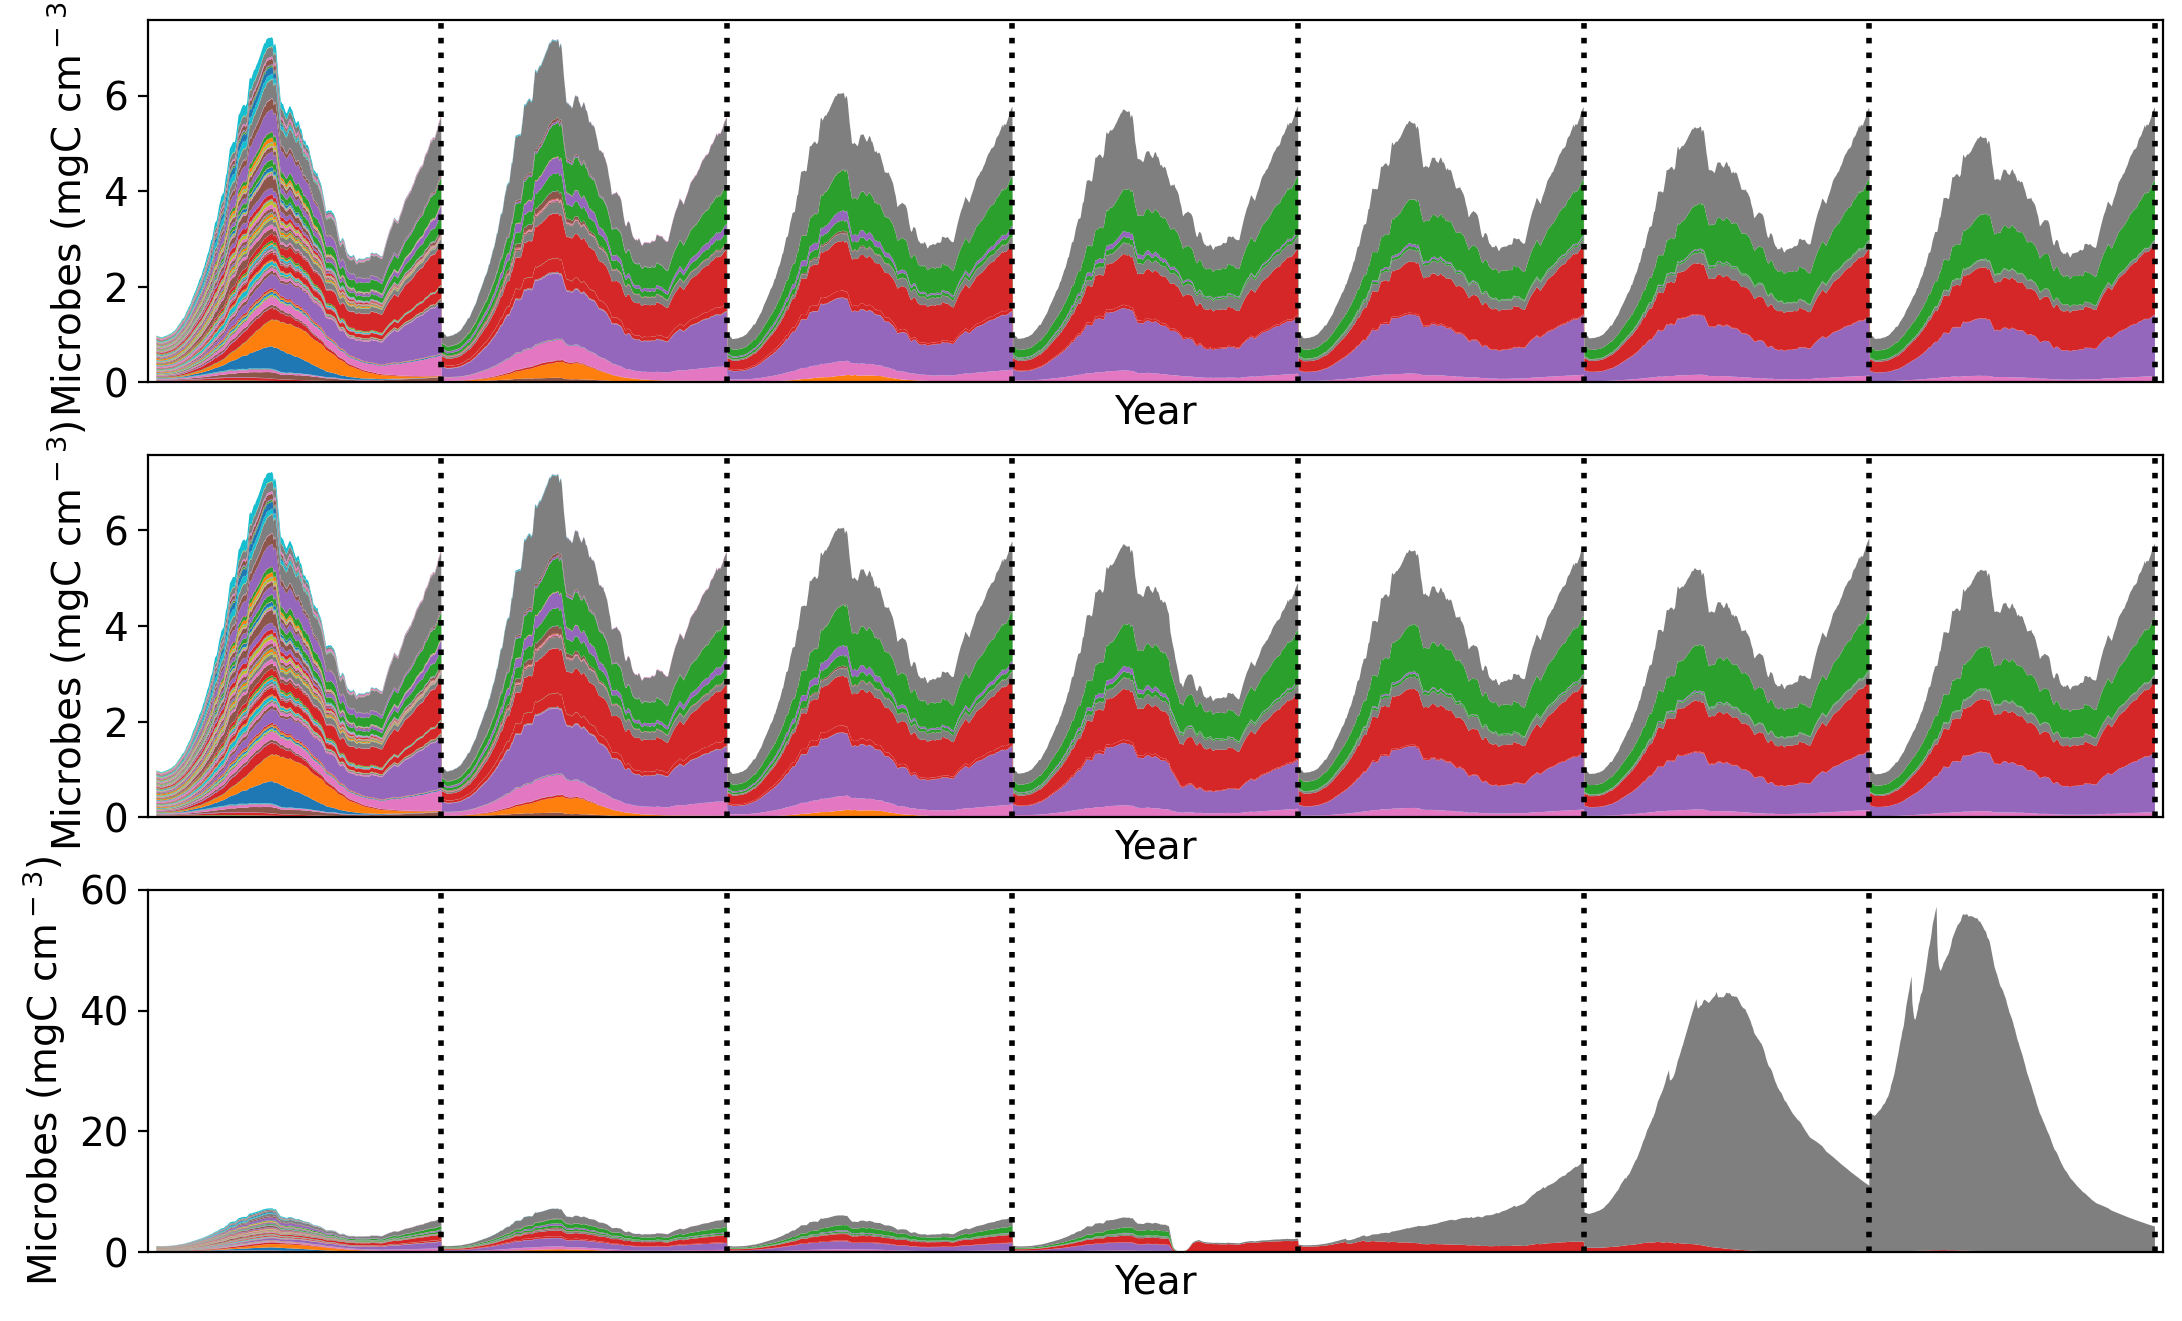

In [54]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(13,8))


####control
ax1.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)
ax1.set_xlim(-10,365*7+10)
#ax1.set_ylim(0,50)
ax1.set_xlabel('Year',size=14)
ax1.set_ylabel('Microbes (mgC cm$^-$$^3$)',size=14)
ax1.stackplot(range(1,365*7+1),Mic_walk_comp.iloc[:,1:])
for i in range(7):
    if (i == 2) | (i==5):
        ax1.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        ax1.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

        
#### thermal extreme
ax2.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)
ax2.set_xlim(-10,365*7+10)
#ax2.set_ylim(0,50)
ax2.set_xlabel('Year',size=14)
ax2.set_ylabel('Microbes (mgC cm$^-$$^3$)',size=14)
ax2.stackplot(range(1,365*7+1),Mic_sc1_comp.iloc[:,1:])
for i in range(7):
    if (i == 2) | (i==5):
        ax2.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        ax2.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
             
#### heat + drought
ax3.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)
ax3.set_xlim(-10,365*7+10)
#ax3.set_ylim(0,50)
ax3.set_xlabel('Year',size=14)
ax3.set_ylabel('Microbes (mgC cm$^-$$^3$)',size=14)
ax3.stackplot(range(1,365*7+1),Mic_sc2_comp.iloc[:,1:])
for i in range(7):
    if (i == 2) | (i==5):
        ax3.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        ax3.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

plt.show()

In [55]:
Mic_walk_traits = pd.read_csv('walk/Mic_traits_walk_walk.csv',index_col=0)
Mic_sc1_traits  = pd.read_csv('sc1/Mic_traits_walk_sc1.csv',  index_col=0)
Mic_sc2_traits  = pd.read_csv('sc2/Mic_traits_walk_sc2.csv',  index_col=0)

In [56]:
Mic_walk_traits

F/B     C      N        P  Uptake_Gene  Enz_Gene  Osmo_Gene  \
Tax1    1.0  25.0  2.502  0.27780         11.0      22.0        1.0   
Tax2    0.0   1.0  0.194  0.01817          6.0       6.0        1.0   
Tax3    0.0   1.0  0.194  0.01817         14.0      29.0        1.0   
Tax4    1.0  25.0  2.502  0.27780         12.0      33.0        1.0   
Tax5    0.0   1.0  0.194  0.01817          9.0      11.0        1.0   
...     ...   ...    ...      ...          ...       ...        ...   
Tax96   0.0   1.0  0.194  0.01817         13.0      18.0        1.0   
Tax97   1.0  25.0  2.502  0.27780         11.0      18.0        1.0   
Tax98   1.0  25.0  2.502  0.27780         14.0      30.0        1.0   
Tax99   0.0   1.0  0.194  0.01817          5.0       4.0        1.0   
Tax100  1.0  25.0  2.502  0.27780         14.0      30.0        1.0   

        Uptake_Cost  Enz_Consti_Cost  Enz_Induci_Cost  Osmo_Consti_Cost  \
Tax1        0.08154         0.000019         0.000055      8.300000e-07   
Tax2        0.09784         0.000068         0.000098      9.500000e-07   
Tax3        0.01947         0.000031         0.000072      3.000000e-07   
Tax4        0.08550         0.000041         0.000047      6.000000e-07   
Tax5        0.03674         0.000054         0.000049      6.000000e-07   
...             ...              ...              ...               ...   
Tax96       0.06287         0.000084         0.000011      6.600000e-07   
Tax97       0.01509         0.000011         0.000042      4.000000e-07   
Tax98       0.06430         0.000058         0.000082      8.300000e-07   
Tax99       0.04600         0.000093         0.000021      6.600000e-07   
Tax100      0.01663         0.000092         0.000030      6.000000e-07   

        Osmo_Induci_Cost  Drought_tolerance  Thermal_tolerance  
Tax1             0.07820            0.75800            0.97600  
Tax2             0.02763            0.19430            0.70500  
Tax3             0.02826            0.20140            0.74270  
Tax4             0.07086            0.67630            0.15860  
Tax5             0.03143            0.23670            0.27200  
...                  ...                ...                ...  
Tax96            0.09174            0.90870            0.36380  
Tax97            0.01189            0.01888            0.66700  
Tax98            0.07587            0.73200            0.02527  
Tax99            0.03992            0.33130            0.85000  
Tax100           0.09350            0.92870            0.30250  

[100 rows x 14 columns]

In [62]:
Mic_walk_comp_bac = Mic_walk_comp[Mic_walk_traits['F/B'] == 0.0]
Mic_walk_comp_fun = Mic_walk_comp[Mic_walk_traits['F/B'] == 1.0]

In [63]:
Mic_walk_comp_bac.shape

(42, 2556)

In [64]:
Mic_walk_comp_fun.shape

(58, 2556)

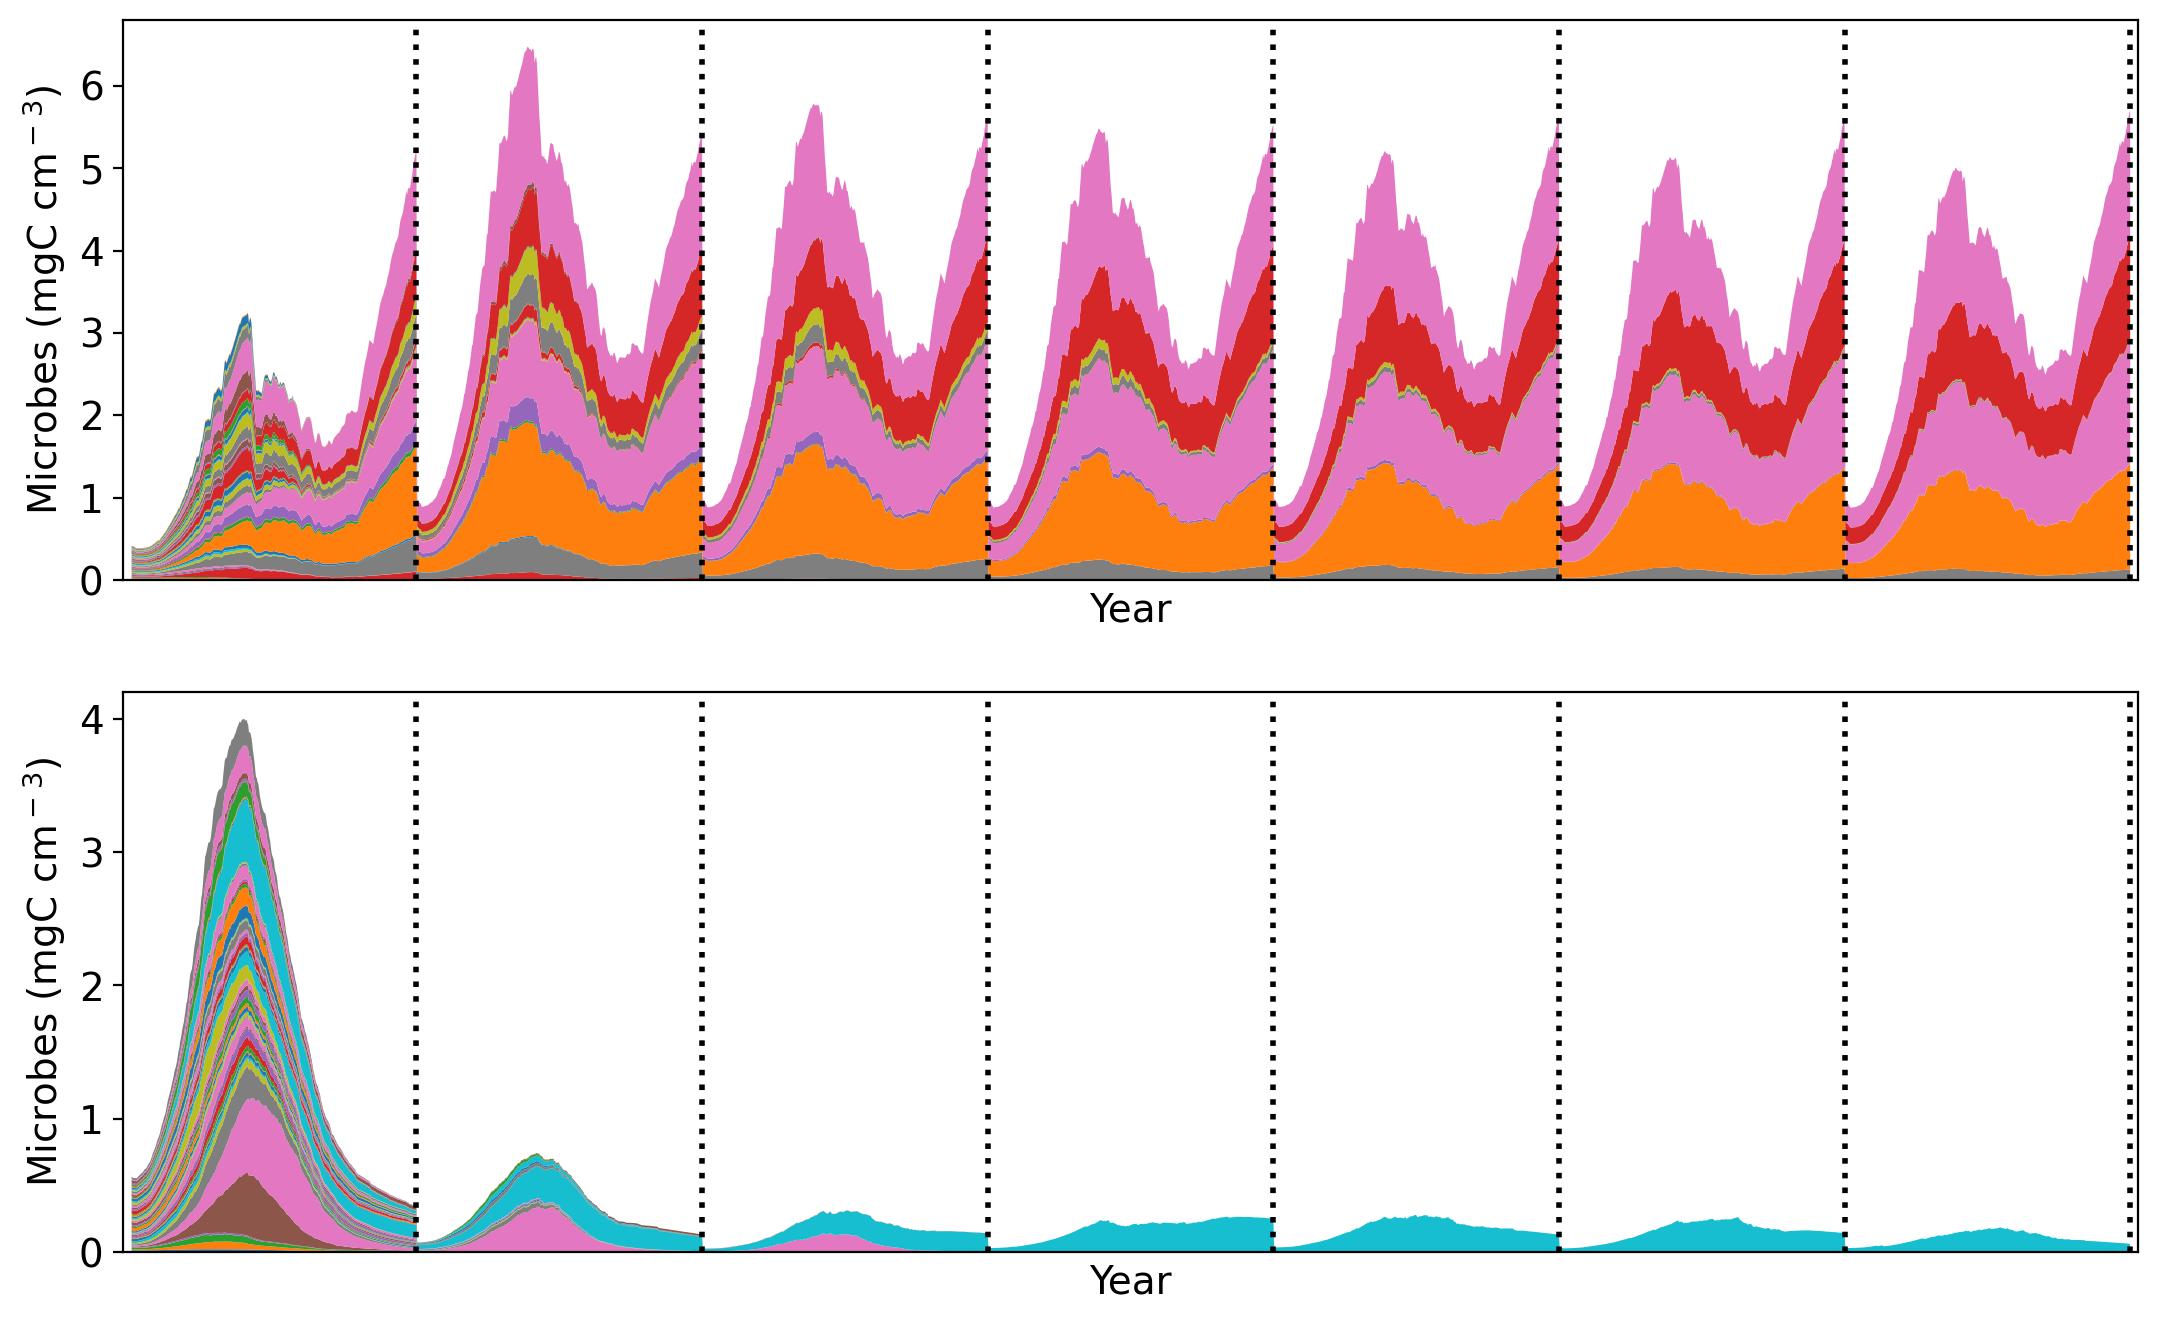

In [67]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(13,8))


####control
ax1.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)
ax1.set_xlim(-10,365*7+10)
#ax1.set_ylim(0,50)
ax1.set_xlabel('Year',size=14)
ax1.set_ylabel('Microbes (mgC cm$^-$$^3$)',size=14)
ax1.stackplot(range(1,365*7+1),Mic_walk_comp_bac.iloc[:,1:])
for i in range(7):
    if (i == 2) | (i==5):
        ax1.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        ax1.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

        
#### thermal extreme
ax2.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)
ax2.set_xlim(-10,365*7+10)
#ax2.set_ylim(0,50)
ax2.set_xlabel('Year',size=14)
ax2.set_ylabel('Microbes (mgC cm$^-$$^3$)',size=14)
ax2.stackplot(range(1,365*7+1),Mic_walk_comp_fun.iloc[:,1:])
for i in range(7):
    if (i == 2) | (i==5):
        ax2.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        ax2.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

plt.show()

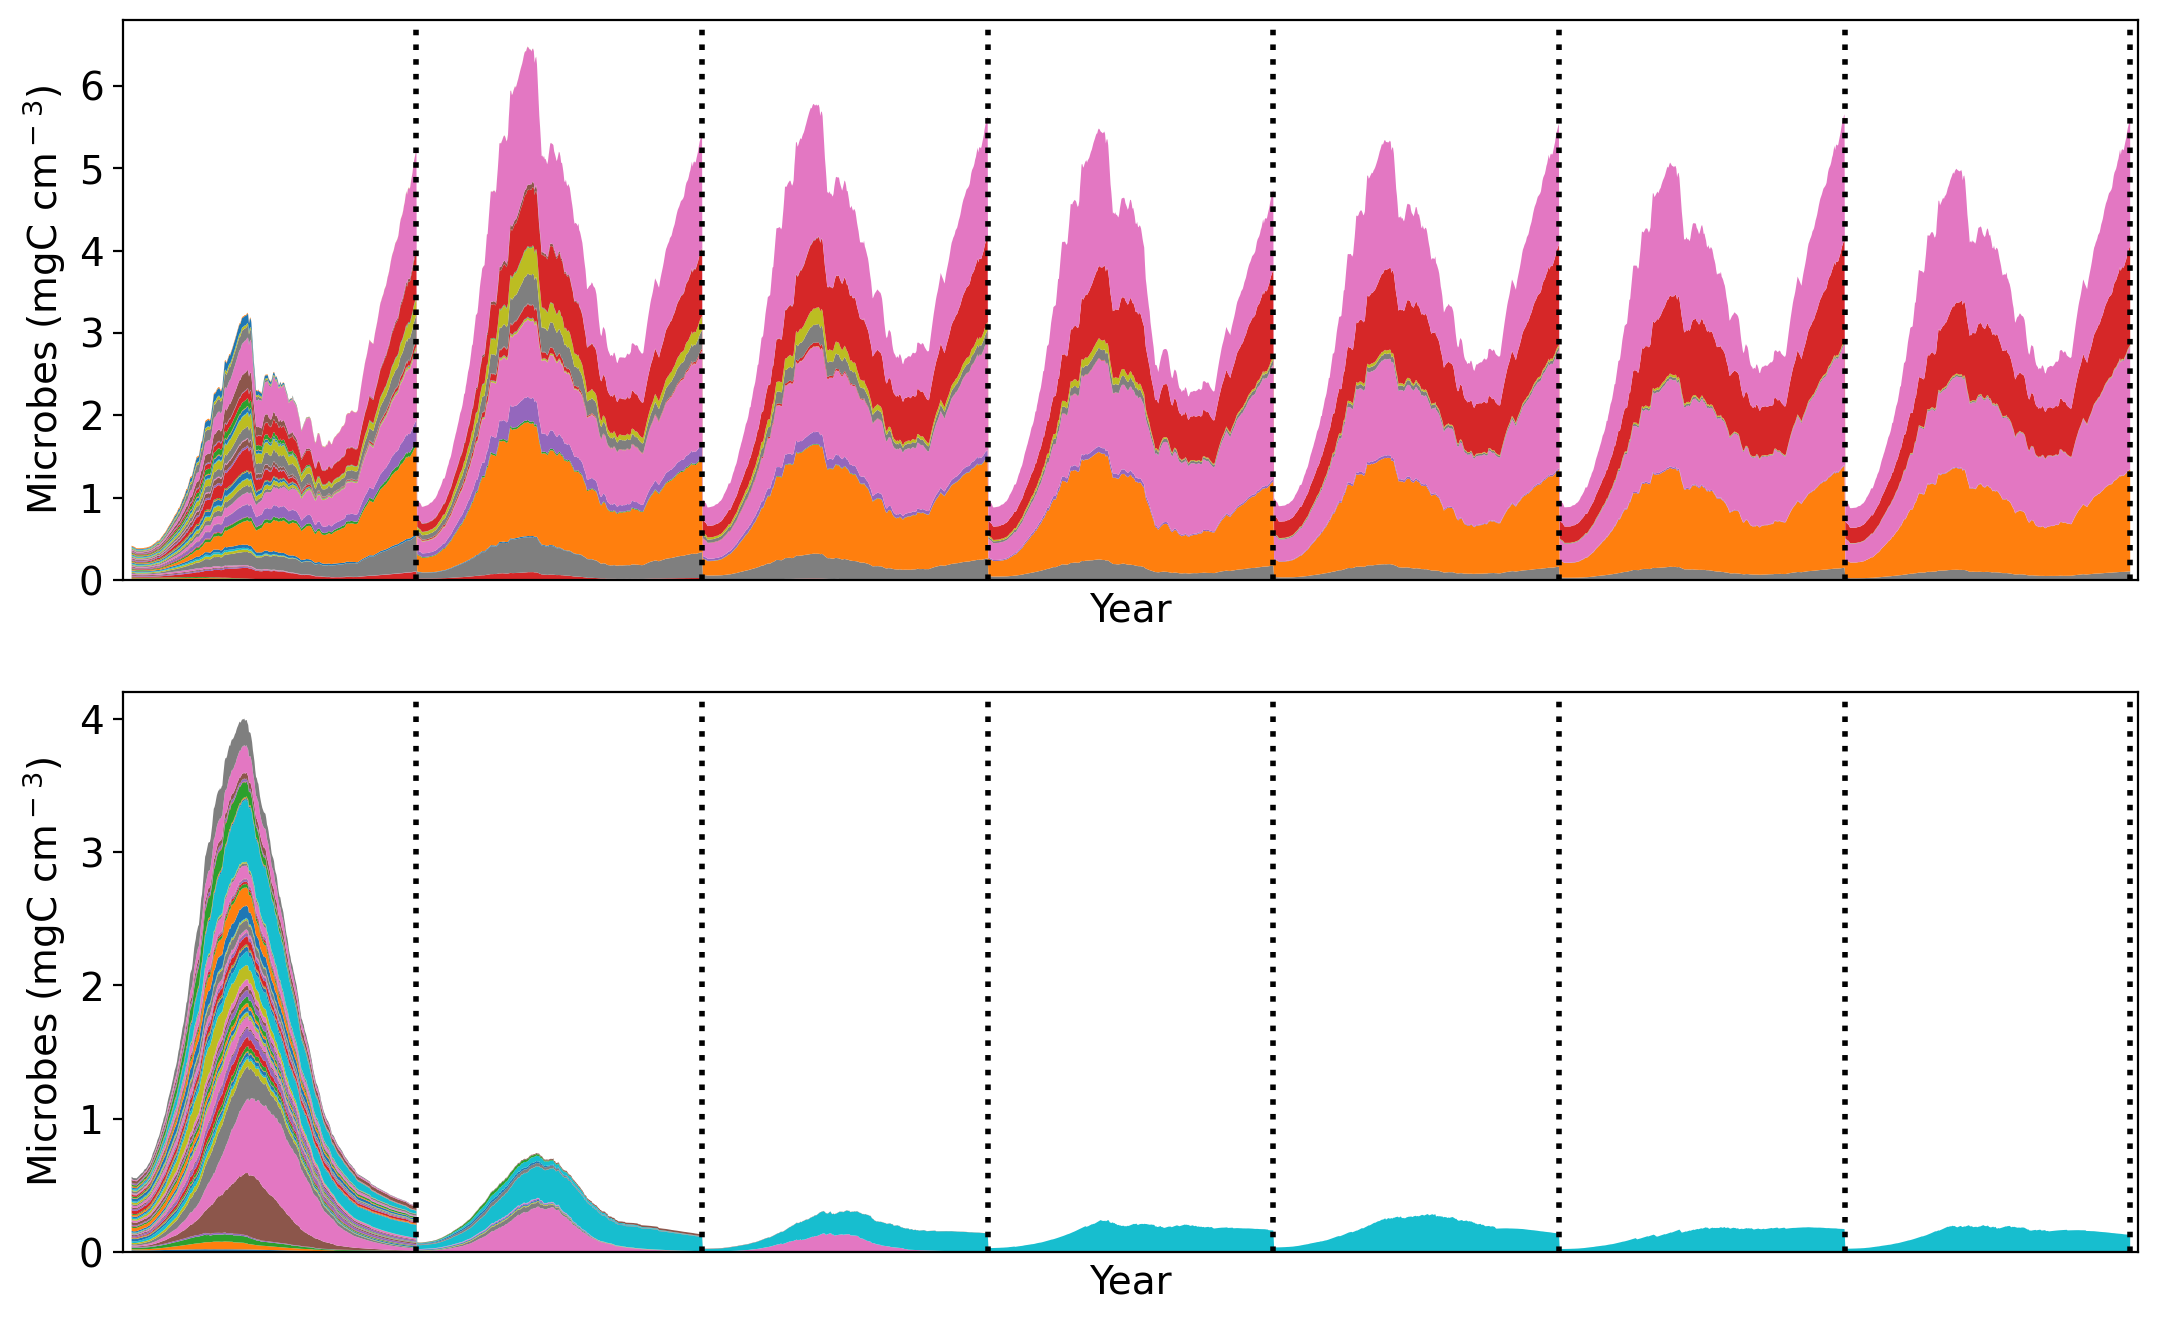

In [71]:
Mic_sc1_comp_bac = Mic_sc1_comp[Mic_sc1_traits['F/B'] == 0.0]
Mic_sc1_comp_fun = Mic_sc1_comp[Mic_sc1_traits['F/B'] == 1.0]

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(13,8))

#### bacteria
ax1.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)
ax1.set_xlim(-10,365*7+10)
#ax1.set_ylim(0,50)
ax1.set_xlabel('Year',size=14)
ax1.set_ylabel('Microbes (mgC cm$^-$$^3$)',size=14)
ax1.stackplot(range(1,365*7+1),Mic_sc1_comp_bac.iloc[:,1:])
for i in range(7):
    if (i == 2) | (i==5):
        ax1.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        ax1.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

        
#### fungi
ax2.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)
ax2.set_xlim(-10,365*7+10)
#ax2.set_ylim(0,50)
ax2.set_xlabel('Year',size=14)
ax2.set_ylabel('Microbes (mgC cm$^-$$^3$)',size=14)
ax2.stackplot(range(1,365*7+1),Mic_sc1_comp_fun.iloc[:,1:])
for i in range(7):
    if (i == 2) | (i==5):
        ax2.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        ax2.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

plt.show()

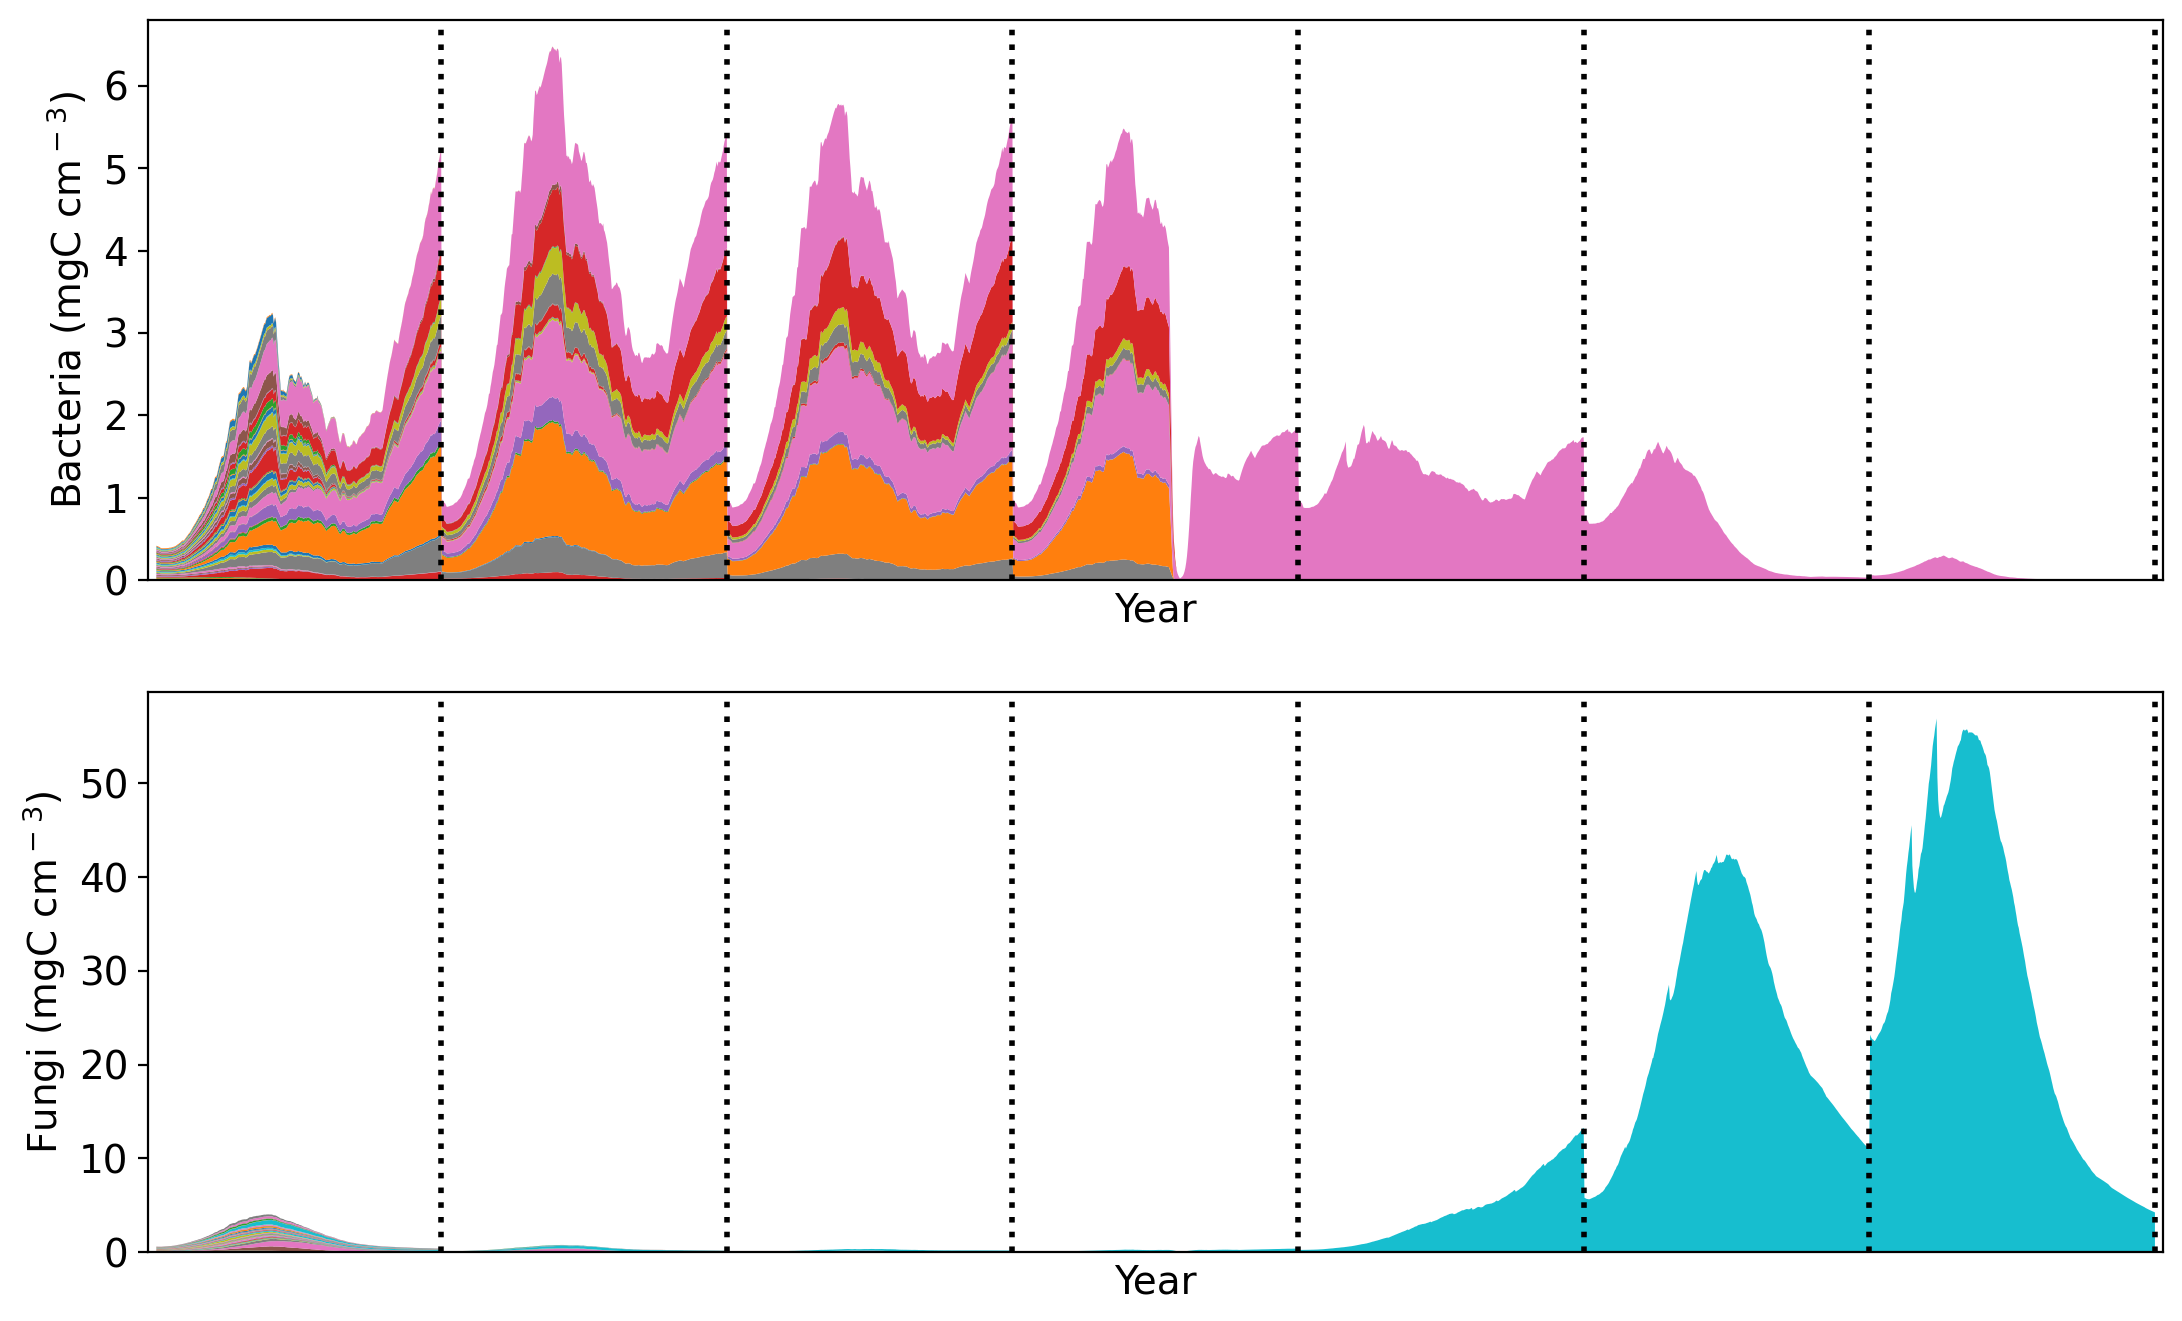

In [75]:
Mic_sc2_comp_bac = Mic_sc2_comp[Mic_sc2_traits['F/B'] == 0.0]
Mic_sc2_comp_fun = Mic_sc2_comp[Mic_sc2_traits['F/B'] == 1.0]

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(13,8))

#### bacteria
ax1.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)
ax1.set_xlim(-10,365*7+10)
#ax1.set_ylim(0,50)
ax1.set_xlabel('Year',size=14)
ax1.set_ylabel('Bacteria (mgC cm$^-$$^3$)',size=14)
ax1.stackplot(range(1,365*7+1),Mic_sc2_comp_bac.iloc[:,1:])
for i in range(7):
    if (i == 2) | (i==5):
        ax1.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        ax1.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

        
#### fungi
ax2.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)
ax2.set_xlim(-10,365*7+10)
#ax2.set_ylim(0,50)
ax2.set_xlabel('Year',size=14)
ax2.set_ylabel('Fungi (mgC cm$^-$$^3$)',size=14)
ax2.stackplot(range(1,365*7+1),Mic_sc2_comp_fun.iloc[:,1:])
for i in range(7):
    if (i == 2) | (i==5):
        ax2.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        ax2.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

plt.show()

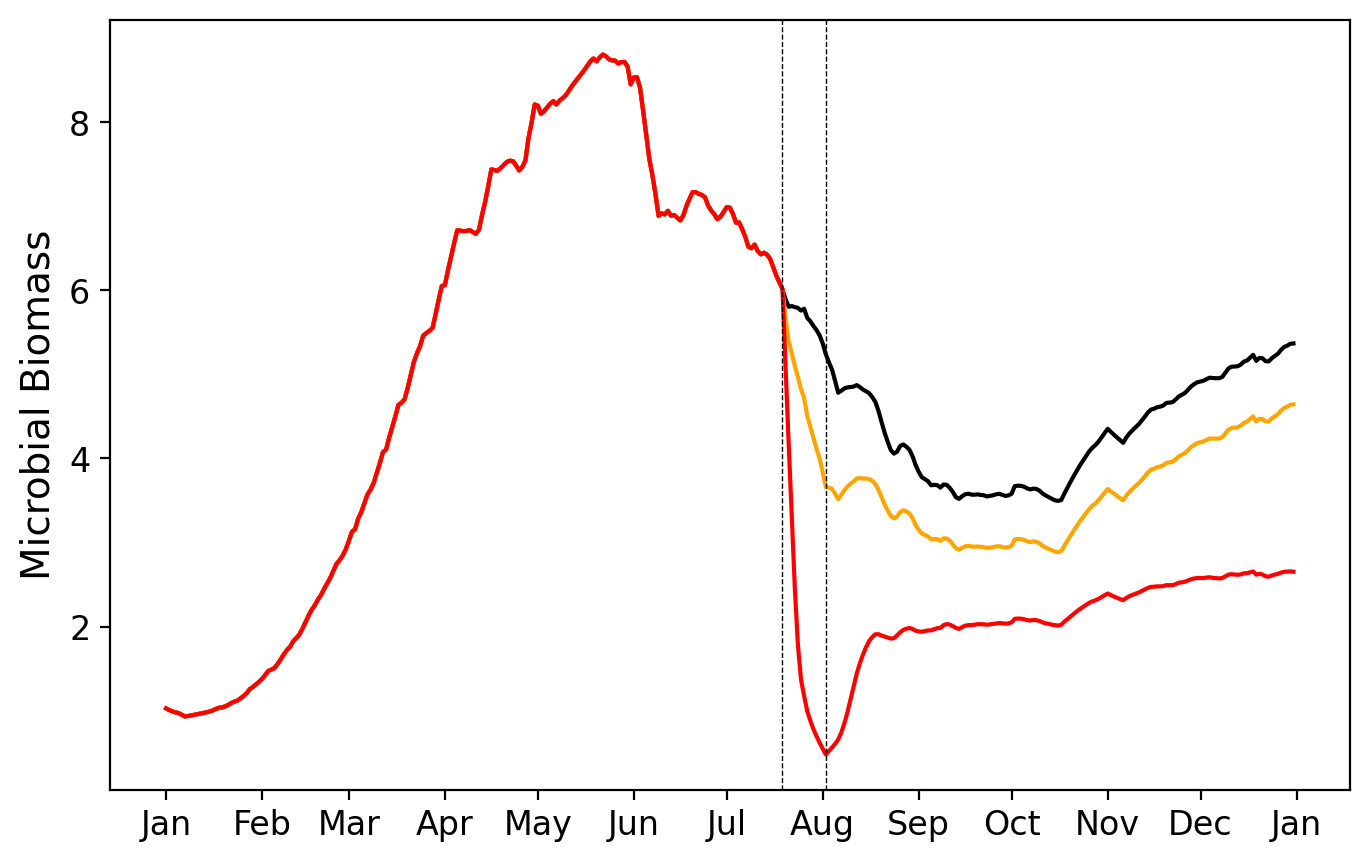

In [8]:
fig,ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(date, Mic_walk.mean(axis=1)[365*3+1:365*4+1],color='black')
ax.plot(date,  Mic_sc1.mean(axis=1)[365*3+1:365*4+1],color='orange')
ax.plot(date,  Mic_sc2.mean(axis=1)[365*3+1:365*4+1],color='red')

ax.axvline(x=np.datetime64('2019-07-19'), color='k',linestyle='--',lw=0.5)
ax.axvline(x=np.datetime64('2019-08-02'), color='k',linestyle='--',lw=0.5)

ax.tick_params(labelsize=12)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_ylabel("Microbial Biomass",size=14)

plt.show()

In [9]:
Sub_walk = pd.read_csv('walk/Sub_walk_walk.csv',index_col=0)/10000
Sub_sc1  = pd.read_csv('sc1/Sub_walk_sc1.csv',  index_col=0)/10000
Sub_sc2  = pd.read_csv('sc2/Sub_walk_sc2.csv',  index_col=0)/10000

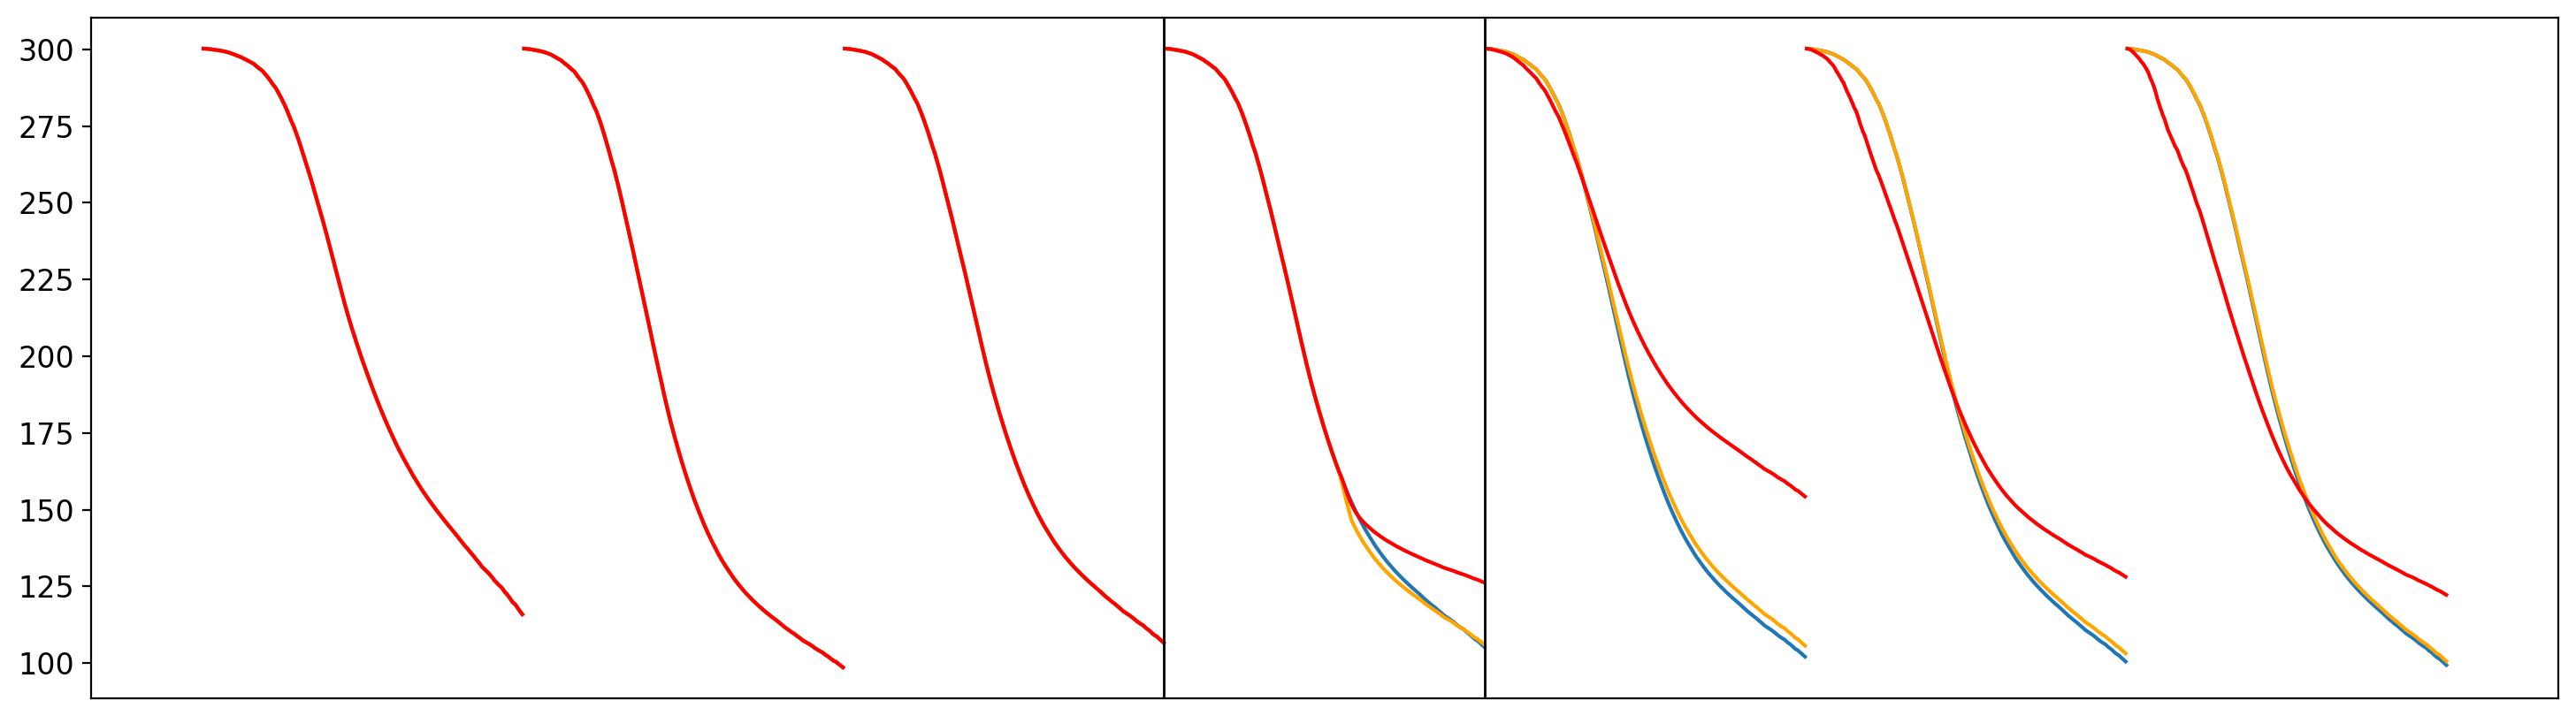

In [10]:
fig,ax = plt.subplots(1,1,figsize=(18,5))

ax.plot(Sub_walk.mean(axis=1))
ax.plot(Sub_sc1.mean(axis=1),color='orange')
ax.plot(Sub_sc2.mean(axis=1),color='red')

ax.axvline(x=365*3, color='k',linestyle='-',lw=1)
ax.axvline(x=365*4, color='k',linestyle='-',lw=1)
ax.tick_params(bottom=False,labelbottom=False,labelsize=12) 

plt.show()

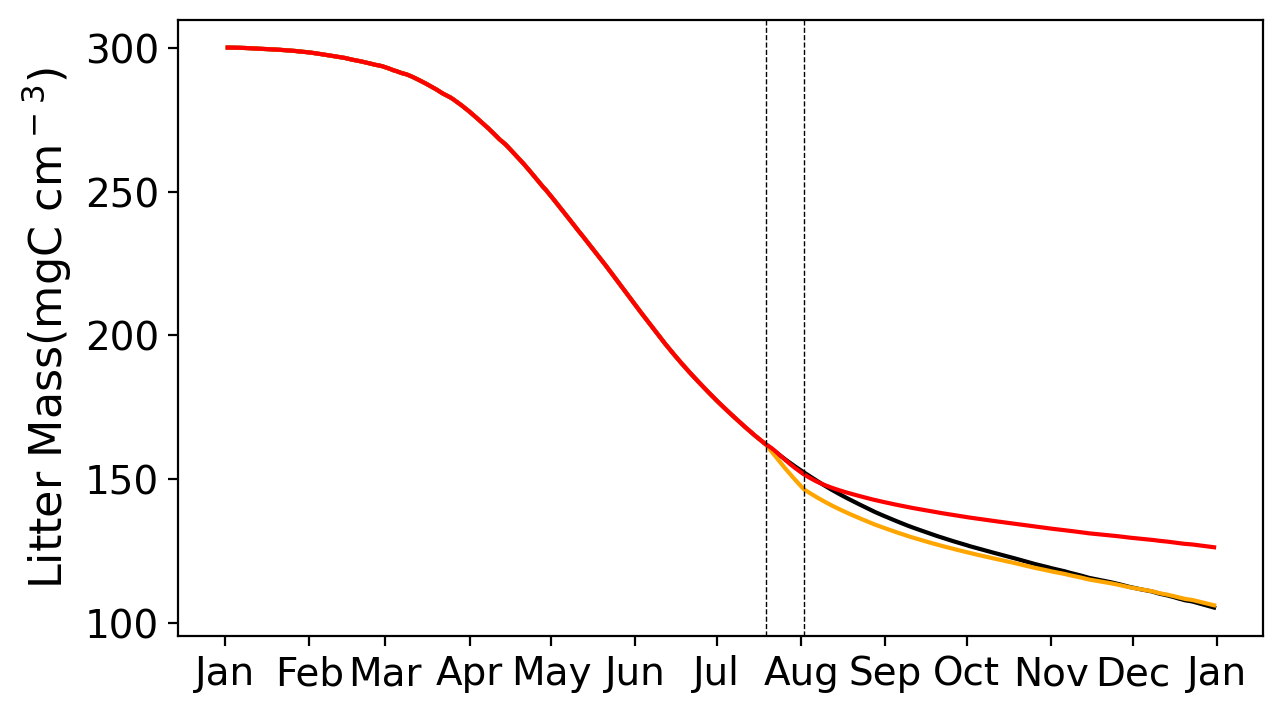

In [11]:
fig,ax = plt.subplots(1,1,figsize=(7,4))

ax.plot(date,Sub_walk.mean(axis=1)[365*3+1:365*4+1],color='black')
ax.plot(date, Sub_sc1.mean(axis=1)[365*3+1:365*4+1],color='orange')
ax.plot(date, Sub_sc2.mean(axis=1)[365*3+1:365*4+1],color='red')

ax.axvline(x=np.datetime64('2019-07-19'), color='k',linestyle='--',lw=0.5)
ax.axvline(x=np.datetime64('2019-08-02'), color='k',linestyle='--',lw=0.5)
ax.tick_params(labelsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_ylabel("Litter Mass(mgC cm$^-$$^3$)",size=16)

plt.show()

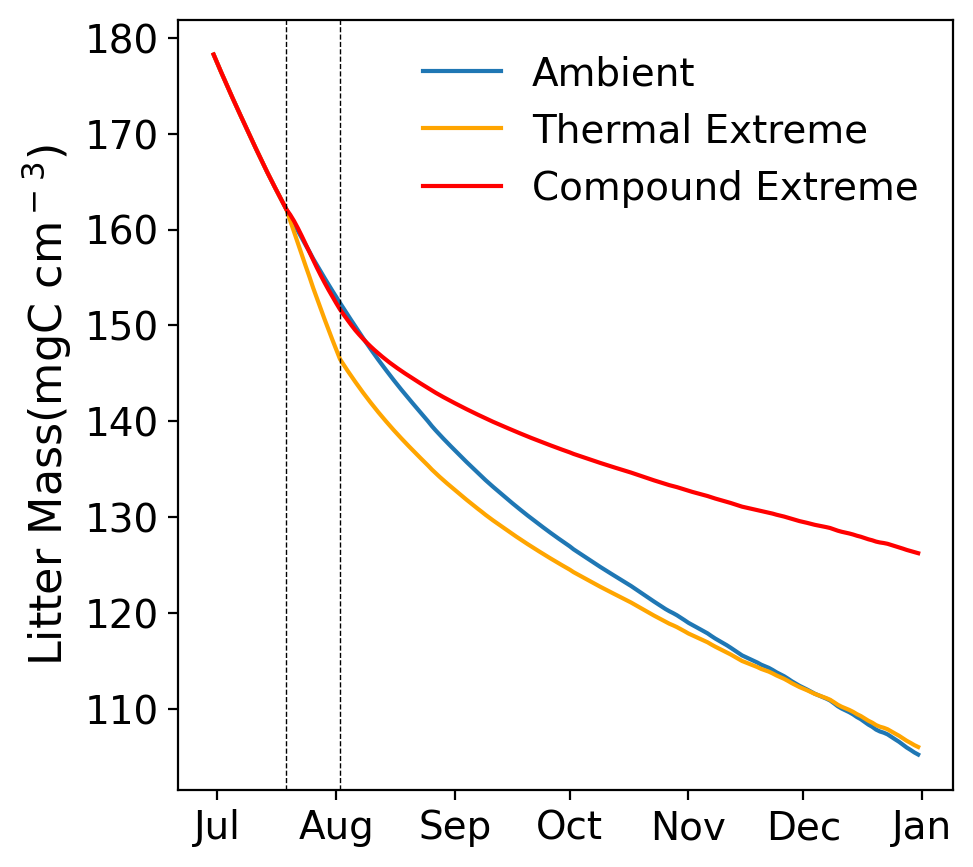

In [29]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(date[180:,],Sub_walk.mean(axis=1)[365*3+1+180:365*4+1])
ax.plot(date[180:,], Sub_sc1.mean(axis=1)[365*3+1+180:365*4+1],color='orange')
ax.plot(date[180:,], Sub_sc2.mean(axis=1)[365*3+1+180:365*4+1],color='red')

ax.axvline(x=np.datetime64('2019-07-19'), color='k',linestyle='--',lw=0.5)
ax.axvline(x=np.datetime64('2019-08-02'), color='k',linestyle='--',lw=0.5)
ax.tick_params(labelsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) 

ax.legend(['Ambient','Thermal Extreme','Compound Extreme'],
          loc='upper right', ncol=1, fontsize=14,frameon=False) #bbox_to_anchor=(0.5,1.2),

ax.set_ylabel("Litter Mass(mgC cm$^-$$^3$)",size=16)

#plt.savefig('litter_mass_dynamics_zoomin.pdf', bbox_inches='tight')

plt.show()

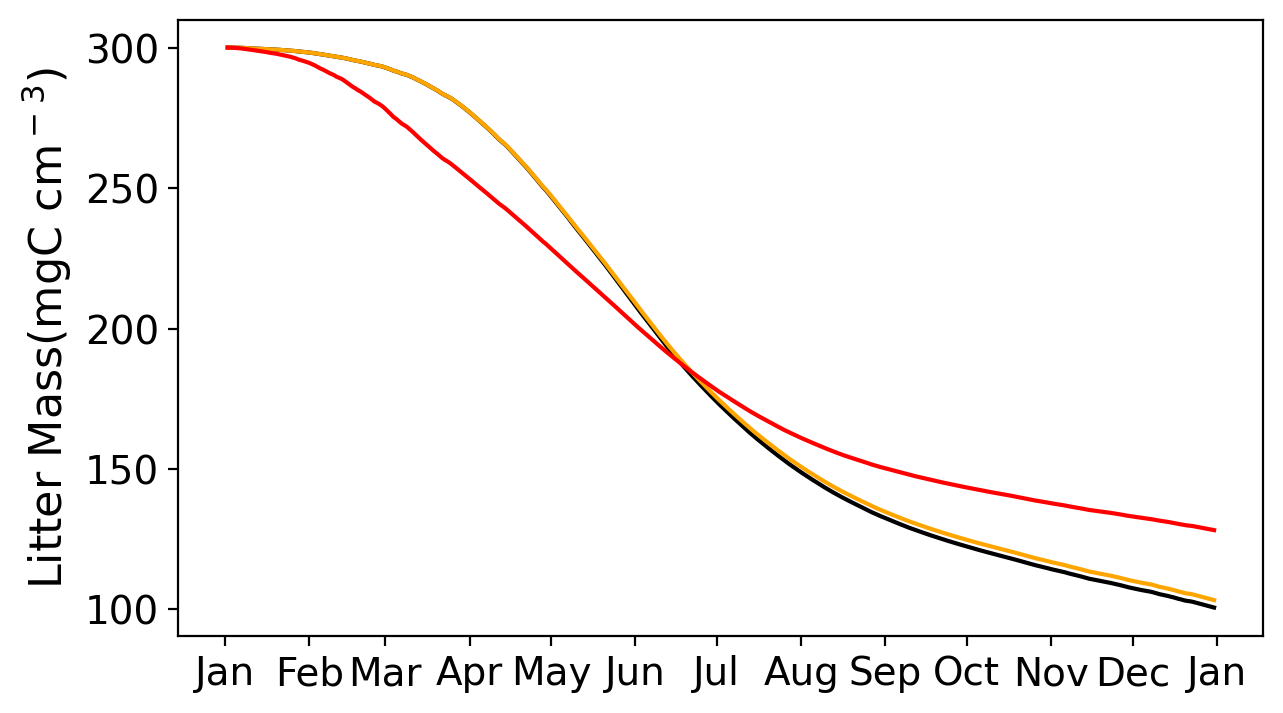

In [30]:
fig,ax = plt.subplots(1,1,figsize=(7,4))

ax.plot(date,Sub_walk.mean(axis=1)[365*5+1:365*6+1],color='black')
ax.plot(date, Sub_sc1.mean(axis=1)[365*5+1:365*6+1],color='orange')
ax.plot(date, Sub_sc2.mean(axis=1)[365*5+1:365*6+1],color='red')

# ax.axvline(x=np.datetime64('2019-07-19'), color='k',linestyle='--',lw=0.5)
# ax.axvline(x=np.datetime64('2019-08-02'), color='k',linestyle='--',lw=0.5)
ax.tick_params(labelsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_ylabel("Litter Mass(mgC cm$^-$$^3$)",size=16)

plt.show()

In [13]:
Enz_walk = pd.read_csv('walk/Enz_walk_walk.csv',  index_col=0)
Enz_sc1  = pd.read_csv(  'sc1/Enz_walk_sc1.csv',  index_col=0)
Enz_sc2  = pd.read_csv(  'sc2/Enz_walk_sc2.csv',  index_col=0)

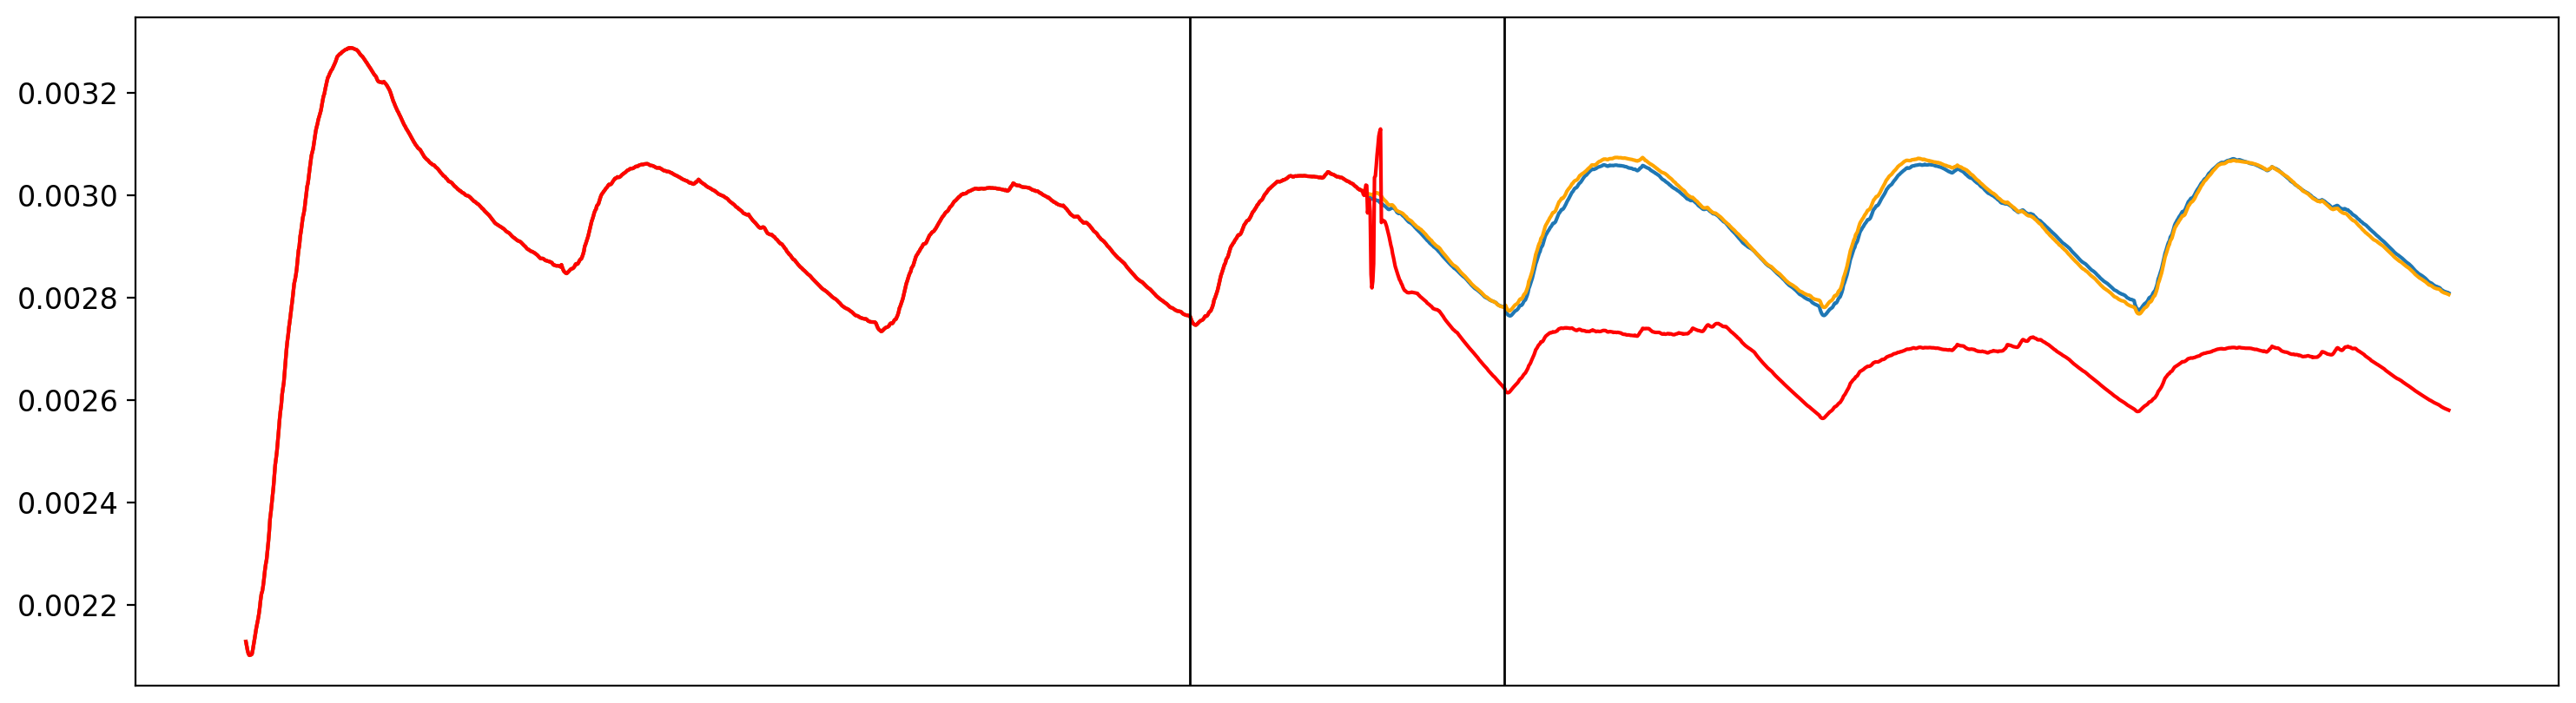

In [14]:
fig,ax = plt.subplots(1,1,figsize=(18,5))

ax.plot(Enz_walk.mean(axis=1))
ax.plot(Enz_sc1.mean(axis=1),color='orange')
ax.plot(Enz_sc2.mean(axis=1),color='red')

ax.axvline(x=365*3, color='k',linestyle='-',lw=1)
ax.axvline(x=365*4, color='k',linestyle='-',lw=1)
ax.tick_params(bottom=False,labelbottom=False,labelsize=12) 

plt.show()

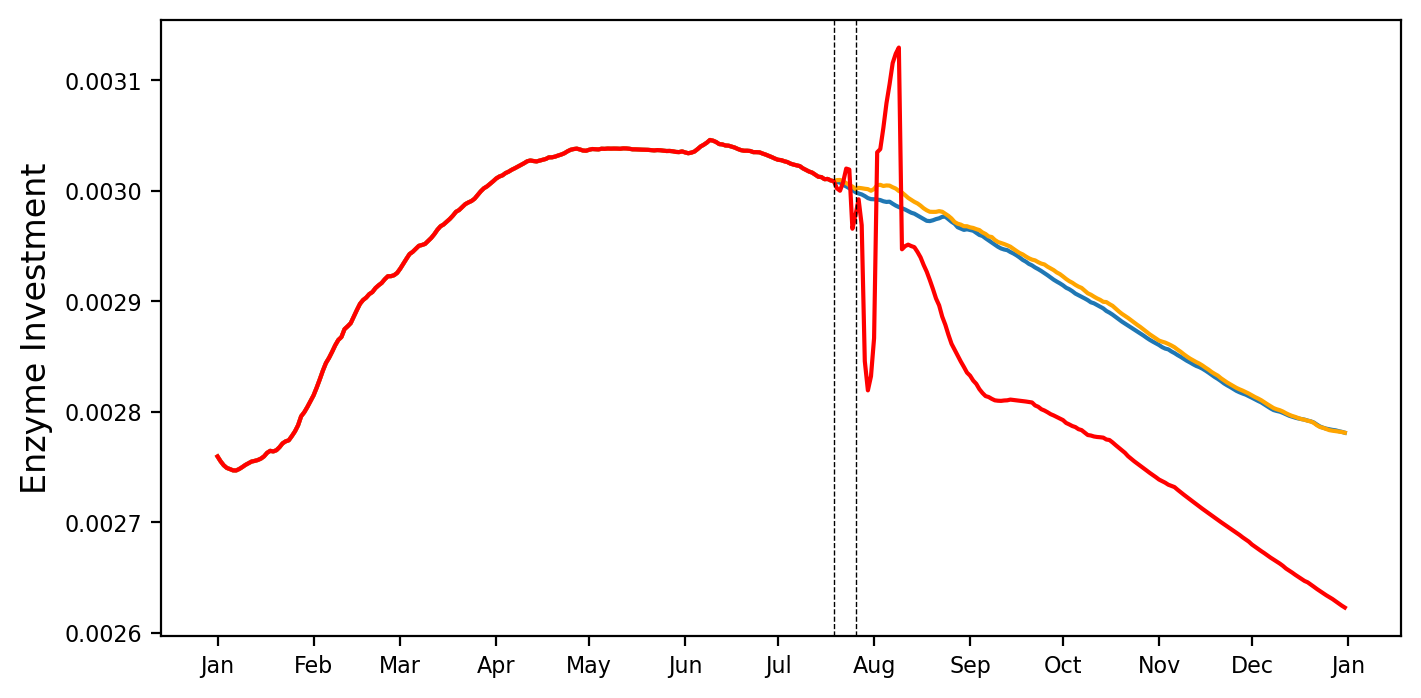

In [16]:
fig,ax = plt.subplots(1,1,figsize=(8,4))

ax.plot(date,Enz_walk.mean(axis=1)[365*3+1:365*4+1])
ax.plot(date, Enz_sc1.mean(axis=1)[365*3+1:365*4+1],color='orange')
ax.plot(date, Enz_sc2.mean(axis=1)[365*3+1:365*4+1],color='red')

ax.axvline(x=np.datetime64('2019-07-19'), color='k',linestyle='--',lw=0.5)
ax.axvline(x=np.datetime64('2019-07-26'), color='k',linestyle='--',lw=0.5)
ax.tick_params(labelsize=8)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_ylabel("Enzyme Investment",size=12)

plt.show()

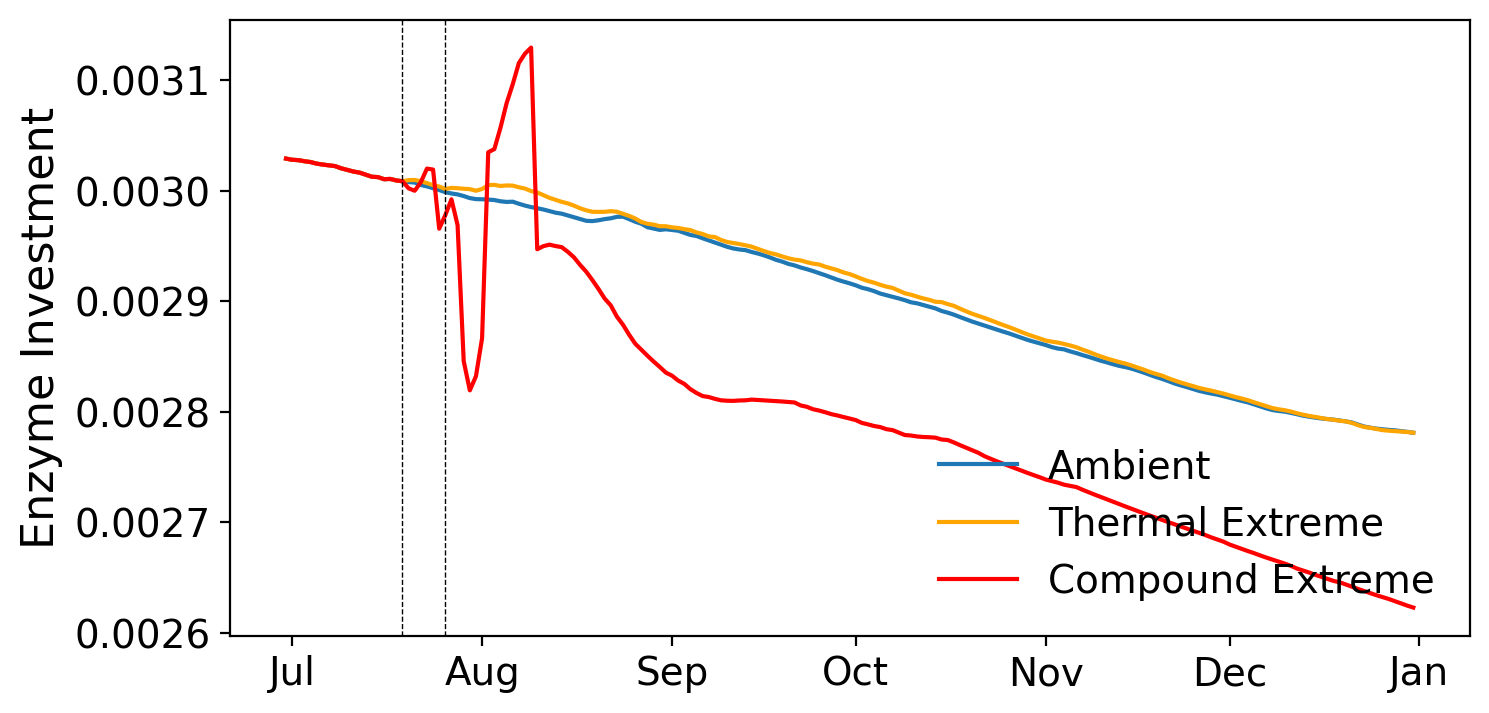

In [17]:
fig,ax = plt.subplots(1,1,figsize=(8,4))

ax.plot(date[180:,],Enz_walk.mean(axis=1)[365*3+1+180:365*4+1])
ax.plot(date[180:,], Enz_sc1.mean(axis=1)[365*3+1+180:365*4+1],color='orange')
ax.plot(date[180:,], Enz_sc2.mean(axis=1)[365*3+1+180:365*4+1],color='red')

ax.axvline(x=np.datetime64('2019-07-19'), color='k',linestyle='--',lw=0.5)
ax.axvline(x=np.datetime64('2019-07-26'), color='k',linestyle='--',lw=0.5)
ax.tick_params(labelsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) 

ax.legend(['Ambient','Thermal Extreme','Compound Extreme'],
          loc='lower right', ncol=1, fontsize=14,frameon=False)

ax.set_ylabel("Enzyme Investment",size=16)

#plt.savefig('litter_mass_dynamics_zoomin.pdf', bbox_inches='tight')

plt.show()

In [18]:
Drt_walk = pd.read_csv('walk/Drt_walk_walk.csv',  index_col=0)
Drt_sc1  = pd.read_csv(  'sc1/Drt_walk_sc1.csv',  index_col=0)
Drt_sc2  = pd.read_csv(  'sc2/Drt_walk_sc2.csv',  index_col=0)

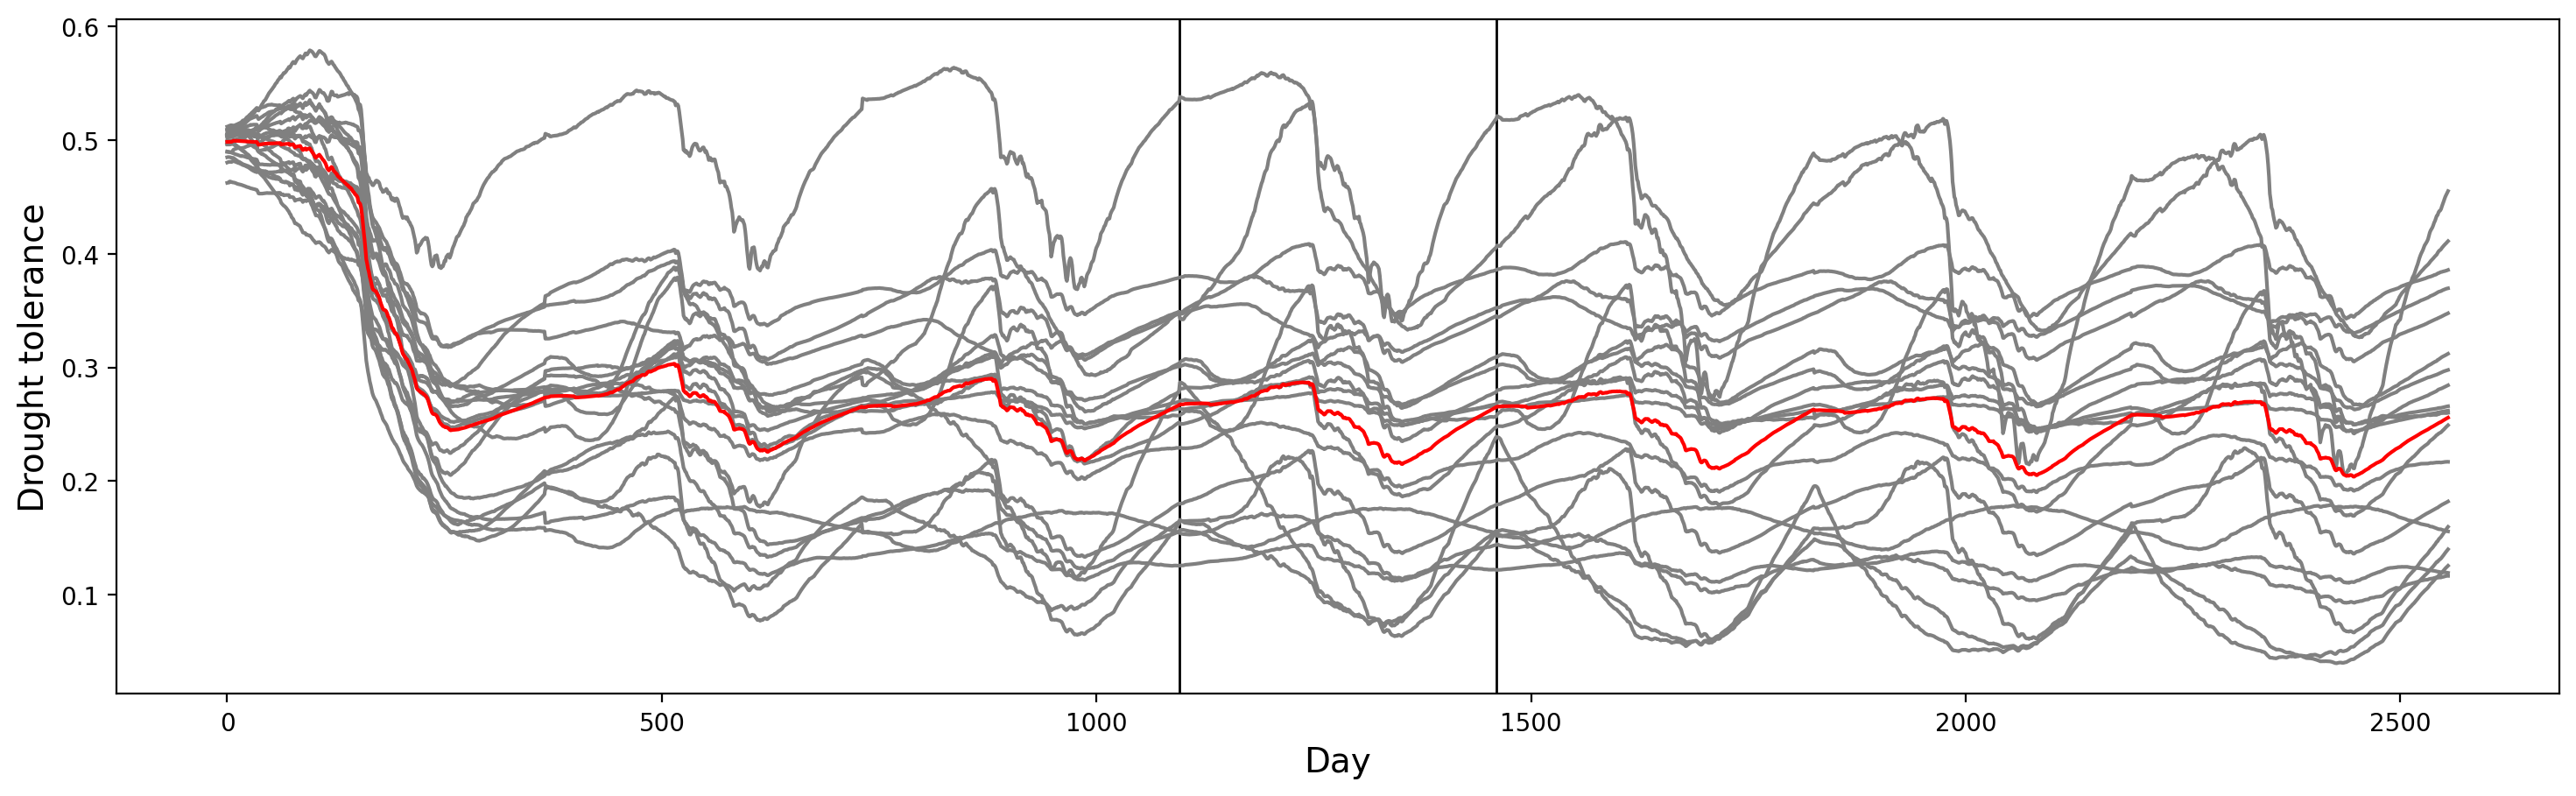

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(18,5))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Drought tolerance',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=1)
ax.axvline(x=365*4, color='k',linestyle='-',lw=1)

for replicate in range(Drt_walk.shape[1]):
    ax.plot(Drt_walk.iloc[:,replicate],color='grey')
ax.plot(Drt_walk.mean(axis=1),color='red')


plt.show()

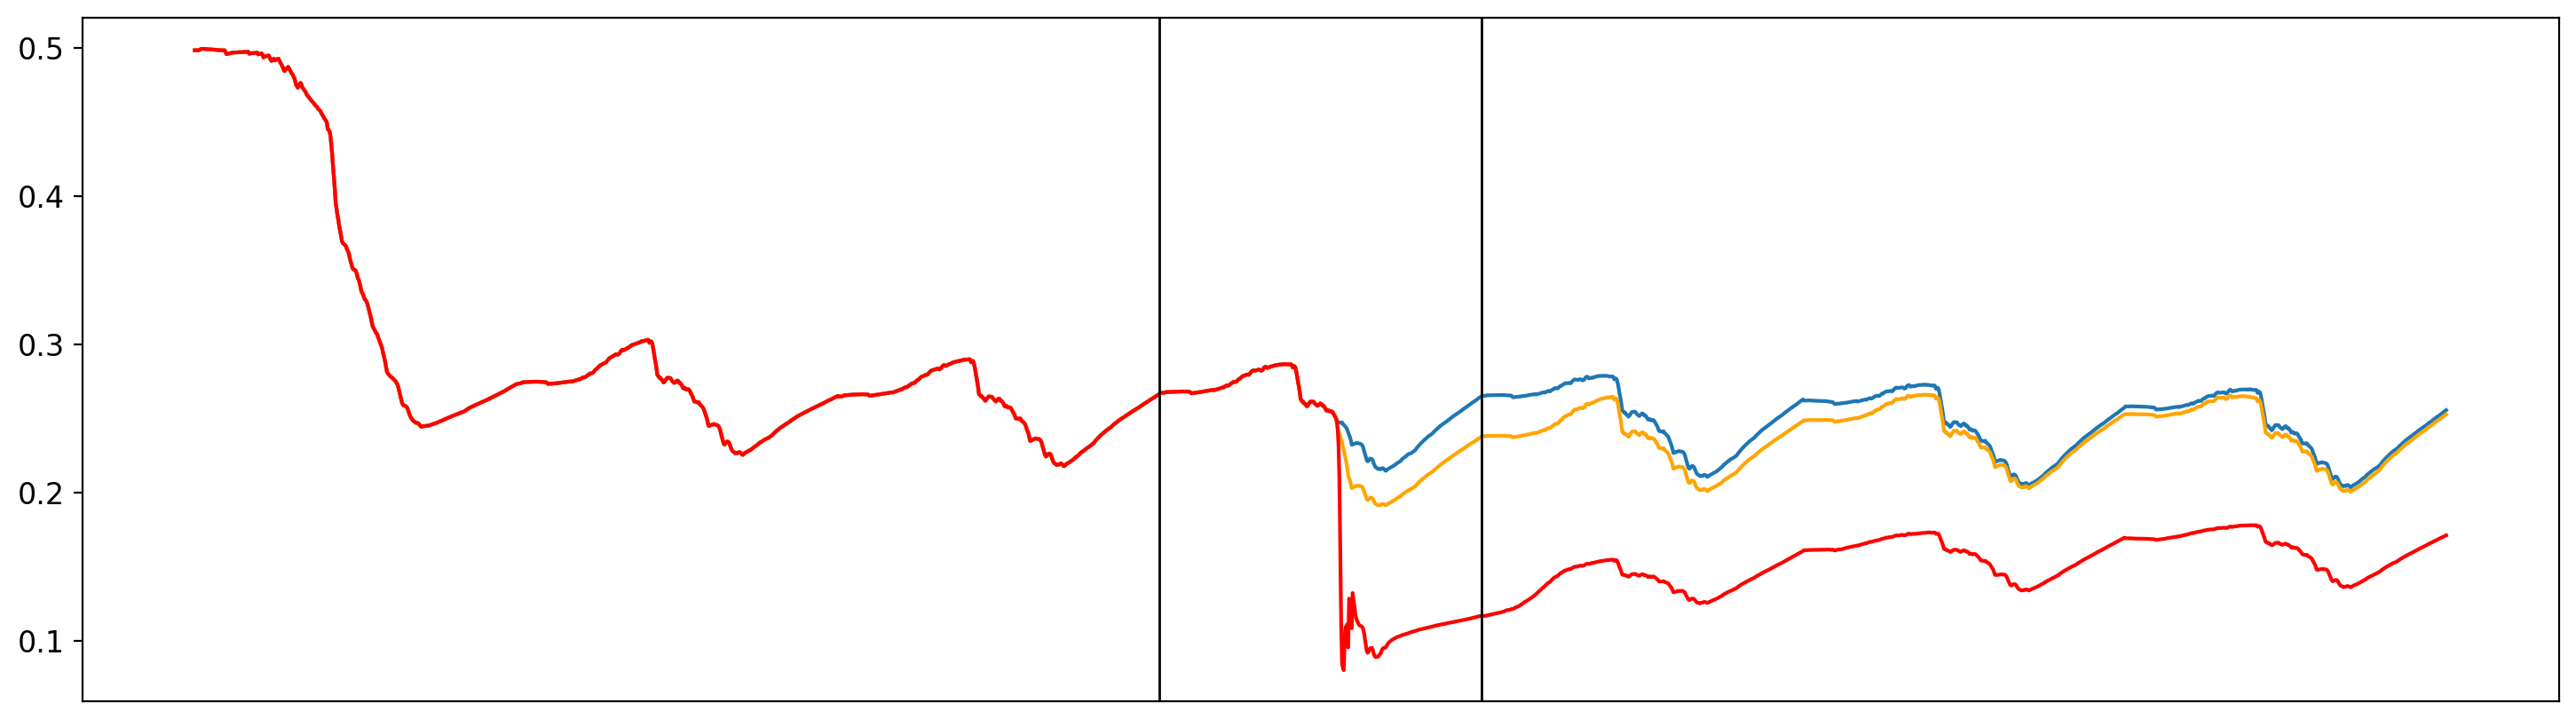

In [20]:
fig,ax = plt.subplots(1,1,figsize=(18,5))

ax.plot(Drt_walk.mean(axis=1))
ax.plot(Drt_sc1.mean(axis=1),color='orange')
ax.plot(Drt_sc2.mean(axis=1),color='red')

ax.axvline(x=365*3, color='k',linestyle='-',lw=1)
ax.axvline(x=365*4, color='k',linestyle='-',lw=1)
ax.tick_params(bottom=False,labelbottom=False,labelsize=12) 

plt.show()

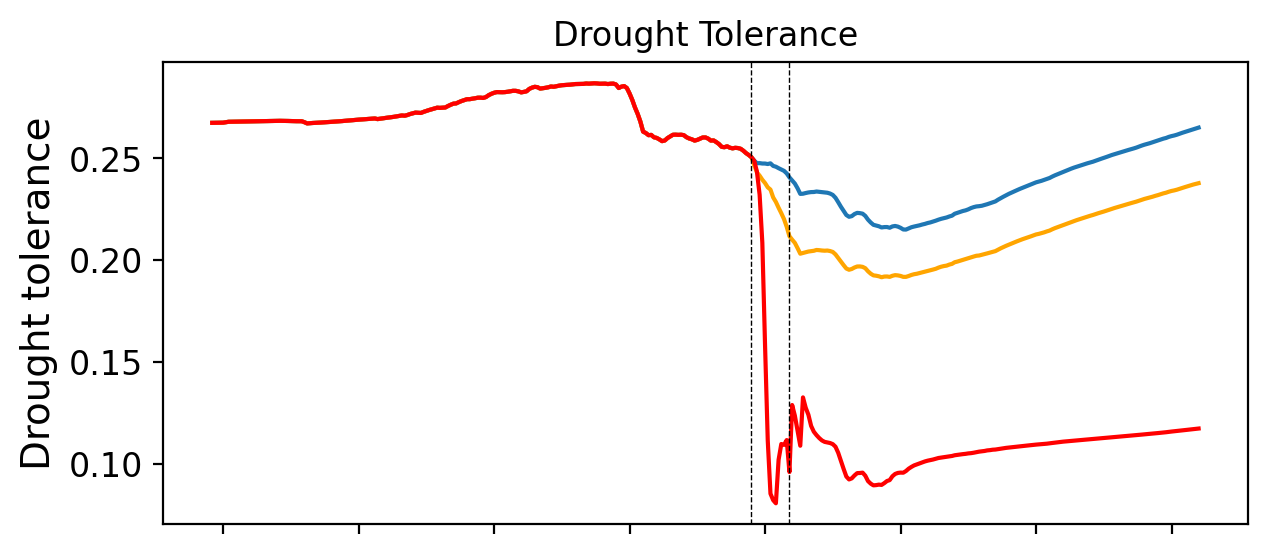

In [21]:
fig,ax = plt.subplots(1,1,figsize=(7,3))

ax.plot(Drt_walk.mean(axis=1)[365*3+1:365*4+1])
ax.plot( Drt_sc1.mean(axis=1)[365*3+1:365*4+1],color='orange')
ax.plot( Drt_sc2.mean(axis=1)[365*3+1:365*4+1],color='red')

ax.axvline(x=365*3+200, color='k',linestyle='--',lw=0.5)
ax.axvline(x=365*3+214, color='k',linestyle='--',lw=0.5)
ax.tick_params(bottom=True,labelbottom=False,labelsize=12) 
ax.set_ylabel("Drought tolerance",size=14)
ax.set_title('Drought Tolerance')

plt.show()

In [22]:
Thm_walk = pd.read_csv('walk/Thm_walk_walk.csv', index_col=0)
Thm_sc1  = pd.read_csv(  'sc1/Thm_walk_sc1.csv', index_col=0)
Thm_sc2  = pd.read_csv(  'sc2/Thm_walk_sc2.csv', index_col=0)

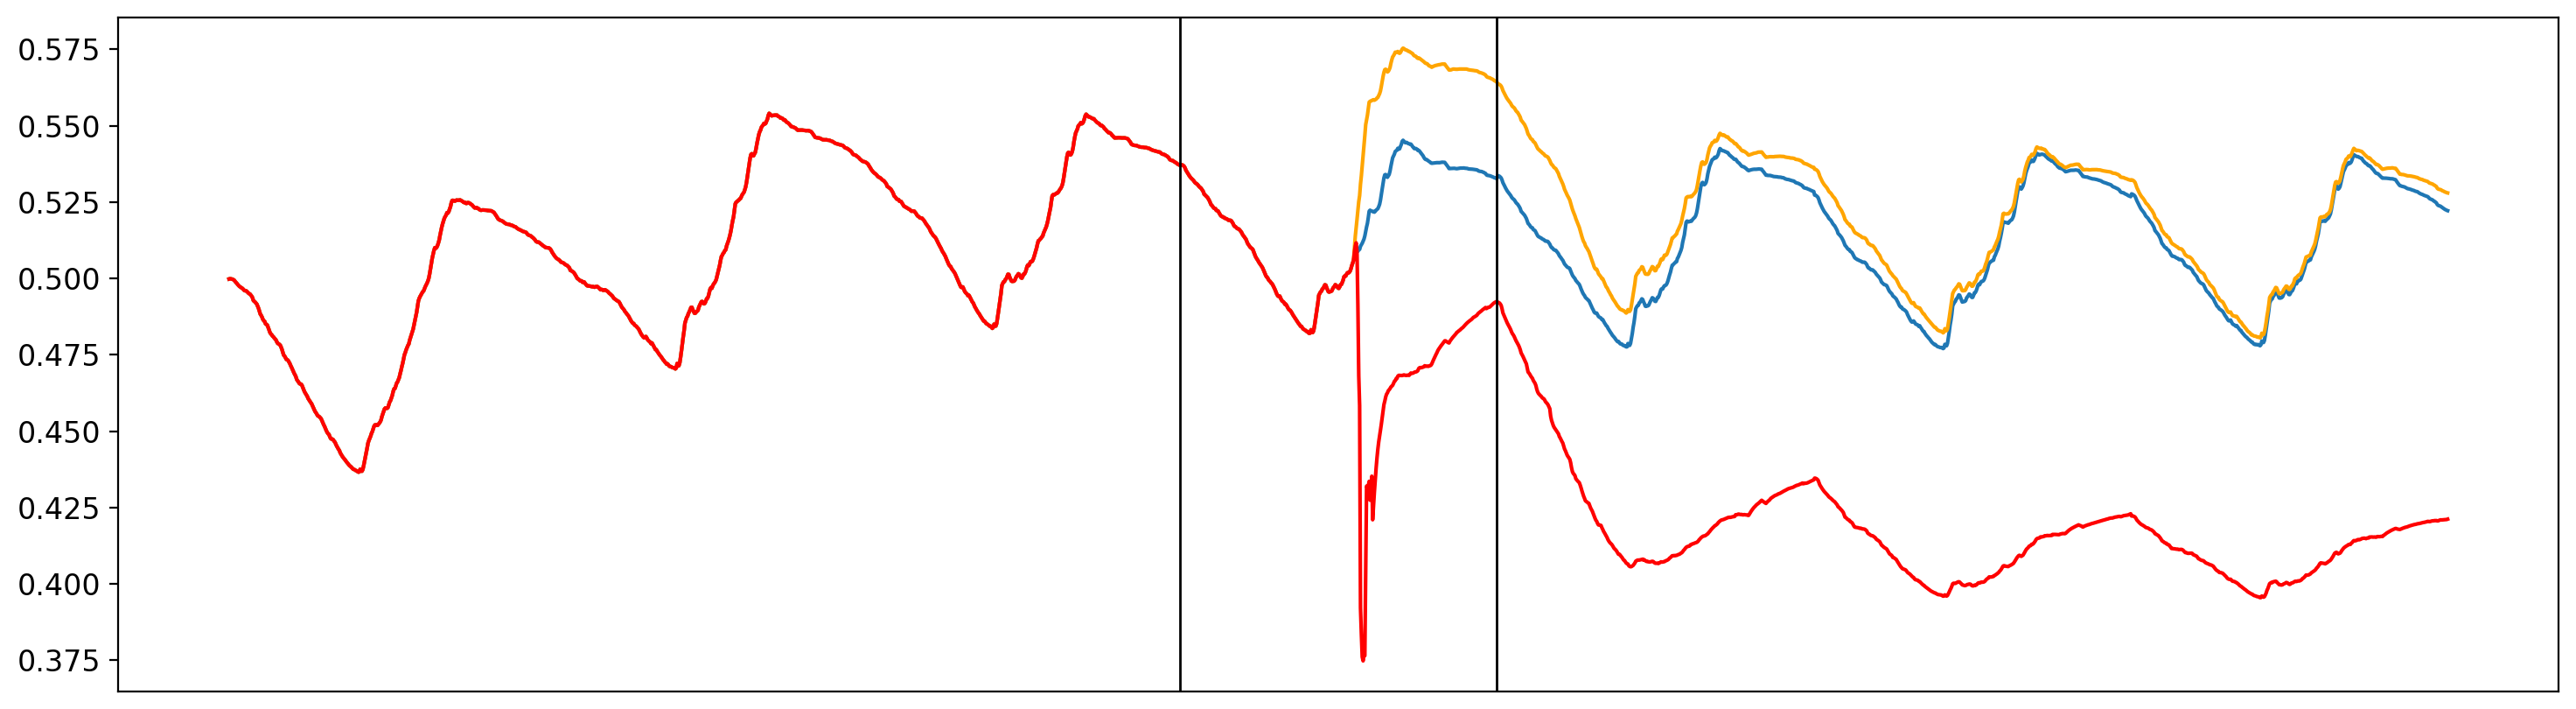

In [23]:
fig,ax = plt.subplots(1,1,figsize=(18,5))

ax.plot(Thm_walk.mean(axis=1))
ax.plot(Thm_sc1.mean(axis=1),color='orange')
ax.plot(Thm_sc2.mean(axis=1),color='red')

ax.axvline(x=365*3, color='k',linestyle='-',lw=1)
ax.axvline(x=365*4, color='k',linestyle='-',lw=1)
ax.tick_params(bottom=False,labelbottom=False,labelsize=12) 

plt.show()

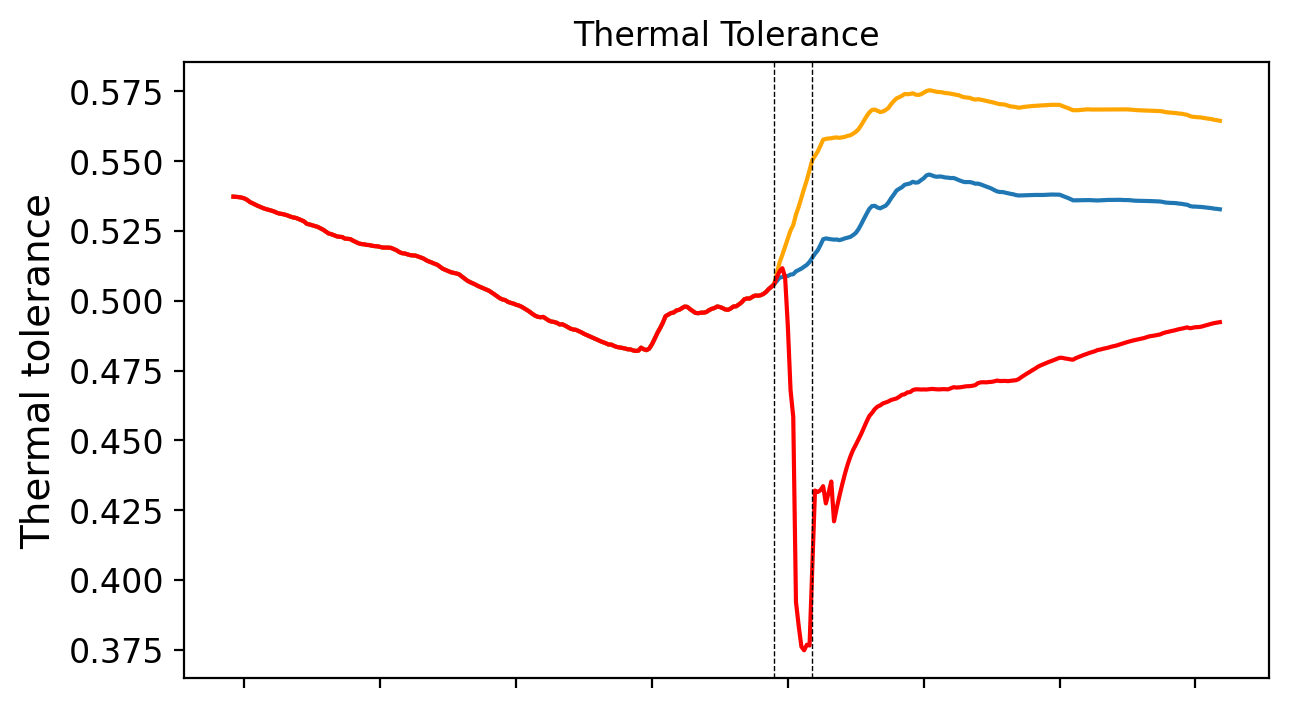

In [24]:
fig,ax = plt.subplots(1,1,figsize=(7,4))

ax.plot(Thm_walk.mean(axis=1)[365*3+1:365*4])
ax.plot( Thm_sc1.mean(axis=1)[365*3+1:365*4],color='orange')
ax.plot( Thm_sc2.mean(axis=1)[365*3+1:365*4],color='red')

ax.axvline(x=365*3+200, color='k',linestyle='--',lw=0.5)
ax.axvline(x=365*3+214, color='k',linestyle='--',lw=0.5)
ax.tick_params(bottom=True,labelbottom=False,labelsize=12) 
ax.set_ylabel("Thermal tolerance",size=14)
ax.set_title('Thermal Tolerance')

plt.show()

In [25]:
Str_walk = pd.read_csv('walk/Str_walk_walk.csv',  index_col=0)
Str_sc1  = pd.read_csv(  'sc1/Str_walk_sc1.csv',  index_col=0)
Str_sc2  = pd.read_csv(  'sc2/Str_walk_sc2.csv',  index_col=0)

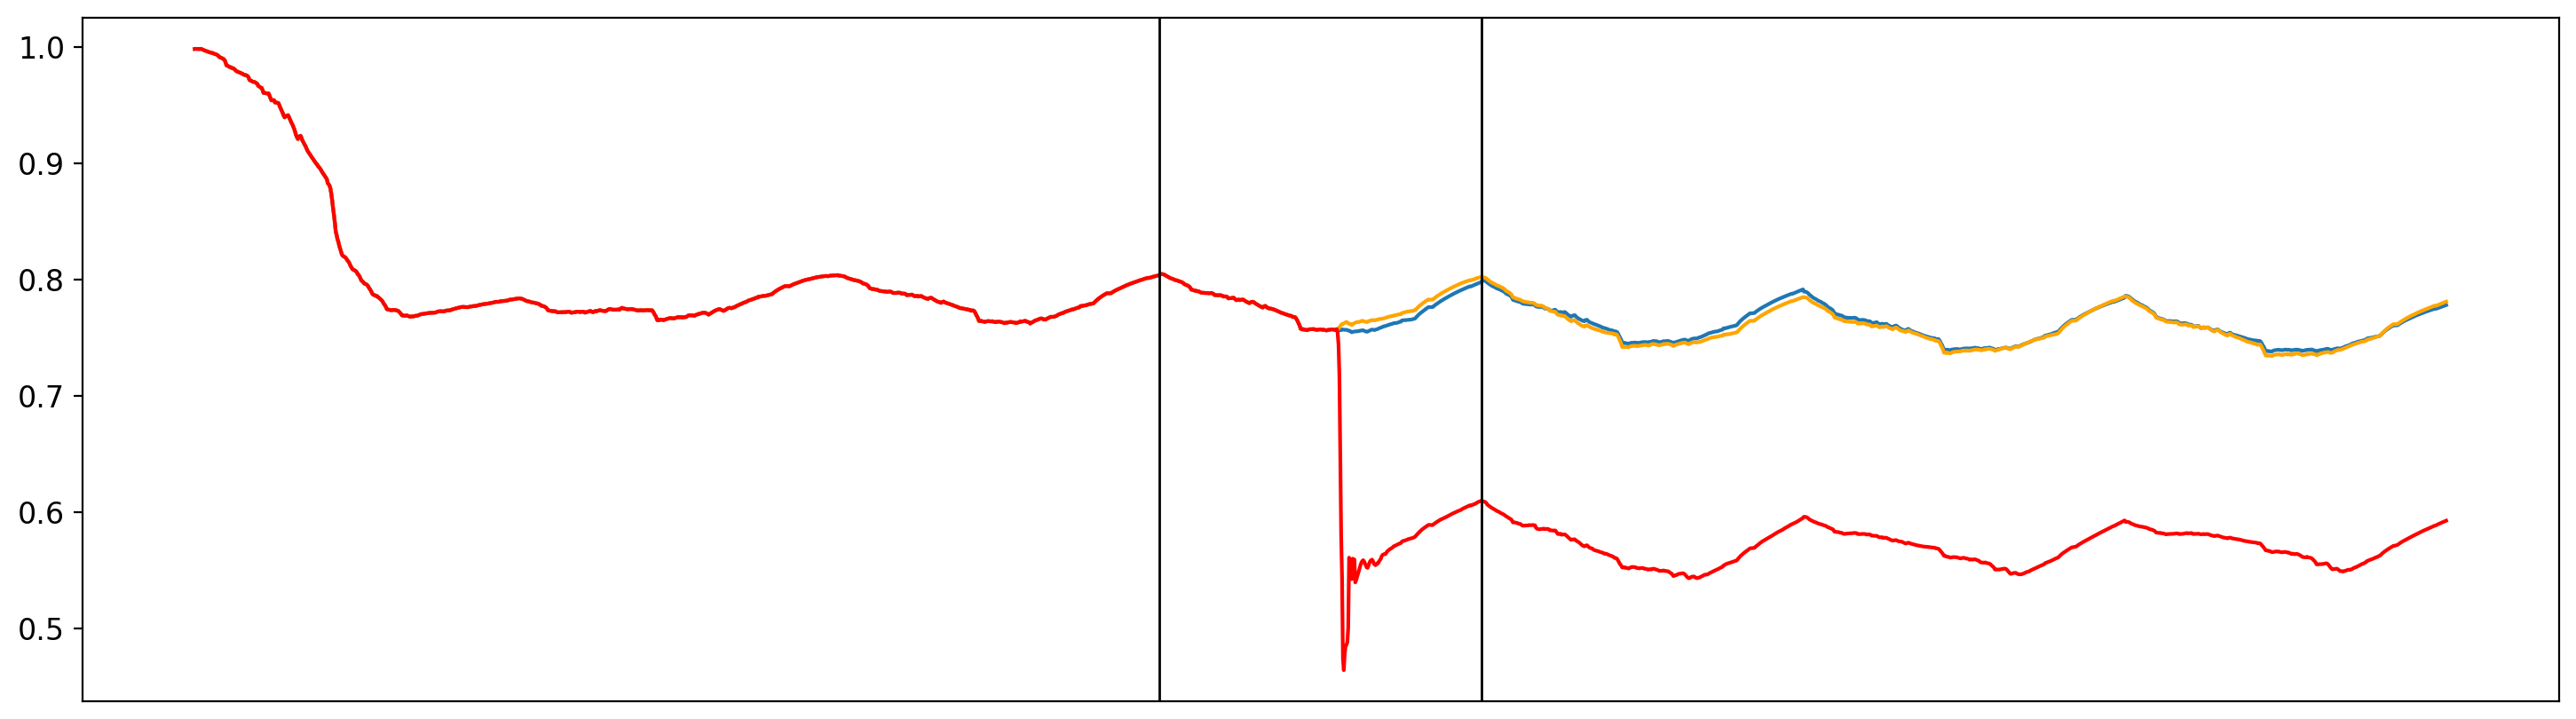

In [26]:
fig,ax = plt.subplots(1,1,figsize=(18,5))

ax.plot(Str_walk.mean(axis=1))
ax.plot(Str_sc1.mean(axis=1),color='orange')
ax.plot(Str_sc2.mean(axis=1),color='red')

ax.axvline(x=365*3, color='k',linestyle='-',lw=1)
ax.axvline(x=365*4, color='k',linestyle='-',lw=1)
ax.tick_params(bottom=False,labelbottom=False,labelsize=12) 

plt.show()

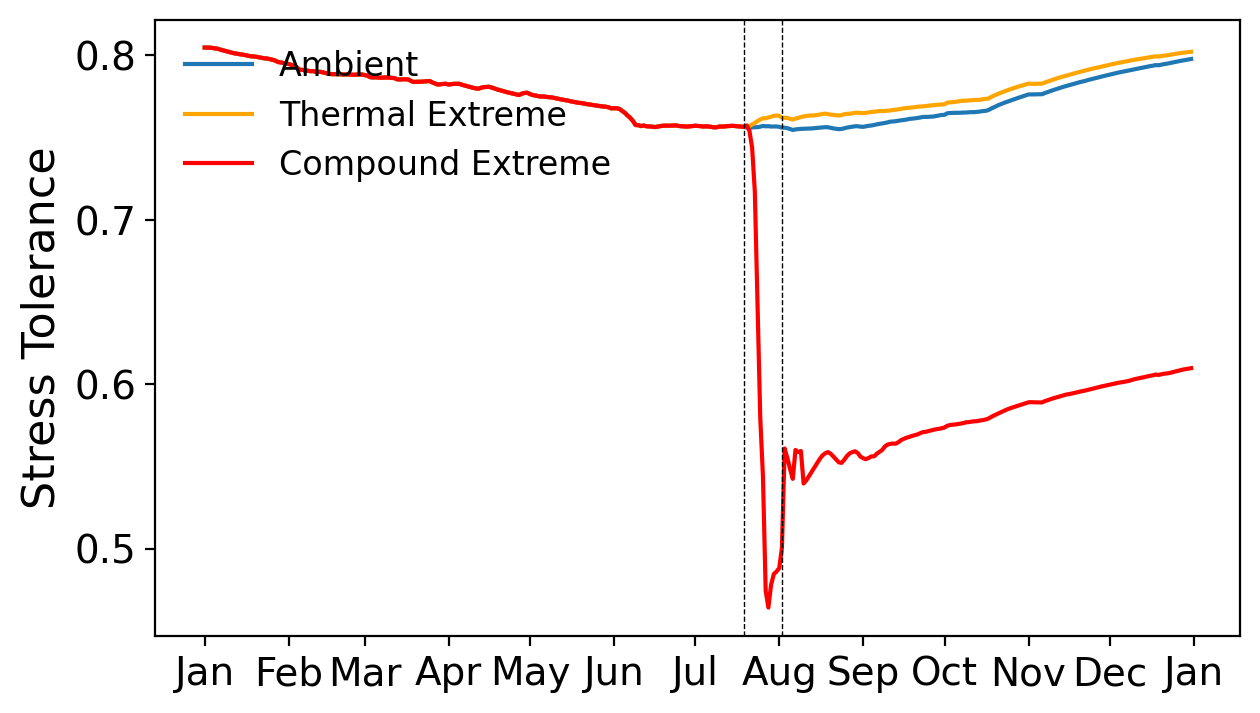

In [27]:
fig,ax = plt.subplots(1,1,figsize=(7,4))

ax.plot(date,Str_walk.mean(axis=1)[365*3+1:365*4+1])
ax.plot(date, Str_sc1.mean(axis=1)[365*3+1:365*4+1],color='orange')
ax.plot(date, Str_sc2.mean(axis=1)[365*3+1:365*4+1],color='red')

ax.axvline(x=np.datetime64('2019-07-19'), color='k',linestyle='--',lw=0.5)
ax.axvline(x=np.datetime64('2019-08-02'), color='k',linestyle='--',lw=0.5)
ax.tick_params(labelsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.legend(['Ambient','Thermal Extreme','Compound Extreme'],
          loc='upper left', ncol=1, fontsize=12,frameon=False)

ax.set_ylabel("Stress Tolerance",size=16)

plt.show()

In [25]:
Str_sc2

0         1         2         3         4       0.1       1.1  \
0     0.982931  1.011841  0.985978  1.028131  0.984742  1.002050  1.004534   
1     0.982705  1.012236  0.986297  1.028324  0.985237  1.002381  1.004131   
2     0.982336  1.012673  0.986422  1.028780  0.983466  1.002651  1.003999   
3     0.982079  1.013127  0.986345  1.029212  0.983423  1.002801  1.003153   
4     0.981870  1.013685  0.985917  1.029540  0.983255  1.002762  1.003180   
...        ...       ...       ...       ...       ...       ...       ...   
2551  0.927447  1.282553  1.653135  0.934849  1.109441  1.319310  1.302052   
2552  0.927163  1.282278  1.653937  0.934398  1.109404  1.318523  1.301282   
2553  0.927183  1.282164  1.654969  0.934170  1.109453  1.318019  1.300544   
2554  0.927192  1.282005  1.655865  0.933921  1.109446  1.317307  1.299817   
2555  0.927390  1.281929  1.657341  0.933882  1.109494  1.317030  1.299124   

           2.1       3.1       4.1       0.2       1.2       2.2       3.2  \
0     1.010571  1.008677  1.004762  1.014923  1.006357  0.976741  0.986840   
1     1.009851  1.009087  1.004416  1.014960  1.006049  0.977551  0.986984   
2     1.009328  1.009237  1.003454  1.014872  1.005718  0.977895  0.987280   
3     1.009302  1.009407  1.003314  1.015903  1.005474  0.978025  0.987481   
4     1.009421  1.009653  1.003368  1.015895  1.005361  0.977775  0.987177   
...        ...       ...       ...       ...       ...       ...       ...   
2551  1.325379  0.482245  1.594232  0.923333  0.988421  1.026767  1.067481   
2552  1.326024  0.482243  1.593542  0.924986  0.988014  1.026493  1.066824   
2553  1.326962  0.482234  1.593020  0.925891  0.987669  1.026257  1.066121   
2554  1.328176  0.482230  1.592370  0.926882  0.987337  1.025972  1.065458   
2555  1.329882  0.482221  1.591856  0.928010  0.986966  1.025724  1.065255   

           4.2       0.3       1.3       2.3       3.3       4.3  
0     1.009384  0.981803  0.995264  0.989830  1.011014  0.967195  
1     1.009873  0.982074  0.994976  0.989865  1.011280  0.967557  
2     1.009949  0.982147  0.994967  0.990227  1.011379  0.967432  
3     1.010176  0.982070  0.994951  0.990534  1.011260  0.967279  
4     1.010205  0.982020  0.994711  0.990931  1.011210  0.966900  
...        ...       ...       ...       ...       ...       ...  
2551  1.008083  0.625576  1.200744  1.231209  1.188948  1.159961  
2552  1.007171  0.626221  1.198978  1.231790  1.188372  1.159739  
2553  1.006349  0.626845  1.197437  1.232159  1.187731  1.159833  
2554  1.005463  0.627441  1.195946  1.232584  1.187279  1.159969  
2555  1.004831  0.628131  1.194578  1.232837  1.187015  1.160068  

[2556 rows x 20 columns]

In [59]:
Str_sc2.mean(axis=1)

0       0.998178
1       0.998292
2       0.998214
3       0.998283
4       0.998311
          ...   
2551    1.031964
2552    1.032185
2553    1.032394
2554    1.032587
2555    1.032763
Length: 2556, dtype: float64

In [60]:
Str_sc1

0         1         2         3         4       0.1       1.1  \
0     0.982931  1.011841  0.985978  1.028131  0.984742  1.002050  1.004534   
1     0.982705  1.012236  0.986297  1.028324  0.985237  1.002381  1.004131   
2     0.982340  1.012675  0.986425  1.028782  0.983470  1.002652  1.004004   
3     0.982099  1.013137  0.986363  1.029224  0.983443  1.002806  1.003185   
4     0.981949  1.013728  0.985984  1.029591  0.983330  1.002782  1.003313   
...        ...       ...       ...       ...       ...       ...       ...   
2551  1.084333  1.171702  1.299497  0.908913  1.061514  1.260881  0.926913   
2552  1.084071  1.171755  1.299074  0.908915  1.061730  1.260342  0.926375   
2553  1.083897  1.171865  1.298930  0.909085  1.061958  1.260136  0.926092   
2554  1.083627  1.172013  1.298807  0.908991  1.062200  1.259660  0.925892   
2555  1.083415  1.172176  1.298643  0.909056  1.062463  1.259762  0.925568   

           2.1       3.1       4.1       0.2       1.2       2.2       3.2  \
0     1.010571  1.008677  1.004762  1.014923  1.006357  0.976741  0.986840   
1     1.009851  1.009087  1.004416  1.014960  1.006049  0.977551  0.986984   
2     1.009334  1.009240  1.003457  1.014875  1.005721  0.977898  0.987281   
3     1.009336  1.009428  1.003336  1.015917  1.005492  0.978047  0.987491   
4     1.009564  1.009738  1.003457  1.015959  1.005434  0.977859  0.987213   
...        ...       ...       ...       ...       ...       ...       ...   
2551  1.252055  1.255261  0.731427  0.970931  0.933922  1.169649  0.751845   
2552  1.252114  1.255284  0.731820  0.972873  0.934118  1.170233  0.753137   
2553  1.252304  1.255354  0.731981  0.974347  0.934438  1.170682  0.754019   
2554  1.252445  1.255387  0.732094  0.975824  0.934641  1.170949  0.755149   
2555  1.252608  1.255474  0.732115  0.977055  0.934806  1.171421  0.756110   

           4.2       0.3       1.3       2.3       3.3       4.3  
0     1.009384  0.981803  0.995264  0.989830  1.011014  0.967195  
1     1.009873  0.982074  0.994976  0.989865  1.011280  0.967557  
2     1.009952  0.982149  0.994971  0.990230  1.011381  0.967435  
3     1.010192  0.982081  0.994974  0.990547  1.011271  0.967295  
4     1.010266  0.982059  0.994800  0.990983  1.011252  0.966961  
...        ...       ...       ...       ...       ...       ...  
2551  1.294226  0.808207  0.945583  0.861914  1.053785  0.984546  
2552  1.294019  0.808117  0.945305  0.863663  1.054149  0.984059  
2553  1.294121  0.808038  0.945268  0.865046  1.054144  0.983489  
2554  1.293879  0.807852  0.945169  0.866506  1.054217  0.982848  
2555  1.293750  0.807792  0.945203  0.867696  1.054225  0.982294  

[2556 rows x 20 columns]